# Natural Language Processing (NLP)
## Machine Learning - 001

<center>
<table align="center">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/christophergarthwood/jbooks/blob/main/STEM-001_WordClouds.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/notebooks?referrer=search&hl=en&project=usfs-ai-bootcamp">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Link to Colab Enterprise
    </a>
  </td>   
  <td style="text-align: center">
    <a href="https://github.com/christophergarthwood/jbooks/blob/main/STEM-001_WordClouds.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/instances?referrer=search&hl=en&project=usfs-ai-bootcamp">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Link to Vertex AI Workbench
    </a>
  </td>
</table>
</center>
</br></br></br>

| | |
|-|-|
|Author(s) | [Christopher G Wood](https://github.com/christophergarthwood)  |

# Overview

This notebook focuses on using  **Natural Language Process (NLP)** techniques to manipulate textual data in preparation for Prompt Engineering and interfacing with a Large Language Model (LLM).

**Natural Language Processing (NLP)** is a machine learning technology that allows computers to understand, interpret, and manipulate human language. NLP is a branch of artificial intelligence (AI) and computer science that uses computational linguistics, statistics, machine learning, and deep learning to analyze and process text and voice data.

NLP has many real-world applications, including:

***Virtual assistants:*** NLP powers virtual assistants like Siri, Alexa, Cortana, and the Oracle Digital Assistant.

***Search engines:*** NLP helps search engines understand the intent behind user queries, providing more relevant results.

***Email spam filtering:*** NLP can identify spam in emails.

***Translation apps:*** NLP can translate text or speech into foreign languages.

***Document summarization:*** NLP can summarize documents.

***Sentiment analysis:*** NLP can analyze the sentiment of text or speech.

***Grammar and spell checking:*** NLP can check grammar and spelling.

***Customer service bots:*** NLP can automate customer support tasks.

NLP is closely related to computational linguistics, which is the study of how language works. NLP is also separate from speech recognition, which turns sound into text and vice versa.

For more information, see the references below.

### Reference for General Jupyter Ecosystem:
+ https://www.dataquest.io/blog/jupyter-notebook-tutorial/
+ https://jupyter.org/
+ https://cloud.google.com/vertex-ai/docs/tutorials/jupyter-notebooks#vertex-ai-workbench
+ https://github.com/christophergarthwood/jbooks/blob/main/000_Intro.ipynb
+ https://www.geeksforgeeks.org/how-to-use-jupyter-notebook-an-ultimate-guide/

### References for NLP
+ https://realpython.com/python-nltk-sentiment-analysis/
+ https://www.nltk.org/howto/classify.html
+ https://www.nltk.org/book/ch06.html
+ https://www.tensorflow.org/text/tutorials/classify_text_with_bert
+ [NLTK Summary](https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3)
+ [How to summarize text with OpenAI and LangChain](https://medium.com/@johnidouglasmarangon/how-to-summarize-text-with-openai-and-langchain-e038fc922af)
+ https://www.geeksforgeeks.org/natural-language-processing-overview/
+ https://aws.amazon.com/what-is/nlp/
+ [Text Summary with Multiple Tools](https://medium.com/analytics-vidhya/text-summarization-using-bert-gpt2-xlnet-5ee80608e961)
+ [Text Summary with Llama2](https://medium.com/@tushitdavergtu/llama2-and-text-summarization-e3eafb51fe28)
+[spaCy](https://spacy.io/)
+ https://coolinfographics.com/word-clouds
+ https://peritract.github.io/2020/04/05/wordclouds-in-python/

### Initial Variable Setup / Project Startup

In [1]:
# Let's define some variables (information holders) for our project overall

global PROJECT_ID, BUCKET_NAME, LOCATION
BUCKET_NAME ="cio-training-vertex-colab"
PROJECT_ID  ="usfs-ai-bootcamp"
LOCATION    = "us-central1"

BOLD_START="\033[1m"
BOLD_END="\033[0m"

In [2]:
# Now create a means of enforcing project id selection

import ipywidgets as widgets
from IPython.display import display

def wait_for_button_press():

    button_pressed = False

    # Create widgets
    html_widget = widgets.HTML(

    value="""
        <center><table><tr><td><h1 style="font-family: Roboto;font-size: 24px"><b>&#128721; &#9888;&#65039; WARNING &#9888;&#65039;	&#128721; </b></h1></td></tr></table</center></br></br>

        <table><tr><td>
            <span style="font-family: Tahoma;font-size: 18">
              This notebook was designed to work in Jupyter Notebook or Google Colab with the understnading that certain permissions might be enabled.</br>
              Please verify that you are in the appropriate project and that the:</br>
              <center><code><b>PROJECT_ID</b></code> </br></center>
              aligns with the Project Id in the upper left corner of this browser and that the location:
              <center><code><b>LOCATION</b></code> </br></center>
              aligns with the instructions provided.
            </span>
          </td></tr></table></br></br>

    """)

    project_list=["usfs-ai-bootcamp", "usfa-ai-advanced-training", "I will setup my own"]
    dropdown = widgets.Dropdown(
        options=project_list,
        value=project_list[0],
        description='Set Your Project:',
    )

    html_widget2 = widgets.HTML(
    value="""
        <center><table><tr><td><h1 style="font-family: Roboto;font-size: 24px"><b>&#128721; &#9888;&#65039; WARNING &#9888;&#65039;	&#128721; </b></h1></td></tr></table</center></br></br>
          """)

    button = widgets.Button(description="Accept")

    # Function to handle the selection change
    def on_change(change):
        global PROJECT_ID
        if change['type'] == 'change' and change['name'] == 'value':
            #print("Selected option:", change['new'])
            PROJECT_ID=change['new']

    # Observe the dropdown for changes
    dropdown.observe(on_change)

    def on_button_click(b):
        nonlocal button_pressed
        global PROJECT_ID
        button_pressed = True
        #button.disabled = True
        button.close()  # Remove the button from display
        with output:
          #print(f"Button pressed...continuing")
          #print(f"Selected option: {dropdown.value}")
          PROJECT_ID=dropdown.value

    button.on_click(on_button_click)
    output = widgets.Output()

    # Create centered layout
    centered_layout = widgets.VBox([
                                    html_widget,
                                    widgets.HBox([dropdown, button]),
                                    html_widget2,
    ], layout=widgets.Layout(
                              display='flex',
                              flex_flow='column',
                              align_items='center',
                              width='100%'
    ))
    # Display the layout
    display(centered_layout)


wait_for_button_press()

### Environment Check

In [3]:
#- Environment Check
import datetime
import platform

RunningInCOLAB = False
RunningInCOLAB = 'google.colab' in str(get_ipython())
current_time   = datetime.datetime.now()
operating_system=platform.system()

if RunningInCOLAB:
    python_environment=" Google Colab "
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = "all"
else:
    python_environment=" Python command-line "

print(f"You are running this notebook in {python_environment} at {BOLD_START}{current_time}{BOLD_END} on {BOLD_START}{operating_system}{BOLD_END} in the {BOLD_START}{PROJECT_ID}{BOLD_END} lab.")

You are running this notebook in  Google Colab  at 2025-01-14 13:33:10.340438 on Linux in the usfs-ai-bootcamp lab.


### Library Management

In [4]:
# Import key libraries necessary to support dynamic installation of additional libraries
import sys
# Use subprocess to support running operating system commands from the program, using the "bang" (!)
# symbology is supported, however that does not translate to an actual python script, this is a more
# agnostic approach.
import subprocess
import importlib.util

#### Install Libraries for Runtime

Creates an install process that installs missing libraries and/or verifies their existence without re-install.

In [5]:
# Identify the libraries you'd like to add to this Runtime environment.
libraries=["backoff", "nltk", "bs4", "wordcloud", "pathlib", "numpy", "Pillow", "pandas",
           "python-dotenv", "seaborn", "rich", "rich[jupyter]", "piexif", "PyMuPDF","unidecode",
           "spacy", "gensim", "cluestar", "watermark", "watermark[GPU]", "scattertext",]

# Loop through each library and test for existence, if not present install quietly
for library in libraries:
    if library == "Pillow":
      spec = importlib.util.find_spec("PIL")
    else:
      spec = importlib.util.find_spec(library)
    if spec is None:
      print("Installing library " + library)
      subprocess.run(["pip", "install" , library, "--quiet"], check=True)
    else:
      print("Library " + library + " already installed.")

Installing library backoff


CompletedProcess(args=['pip', 'install', 'backoff', '--quiet'], returncode=0)

Library nltk already installed.
Library bs4 already installed.
Library wordcloud already installed.
Library pathlib already installed.
Library numpy already installed.
Library Pillow already installed.
Library pandas already installed.
Installing library python-dotenv


CompletedProcess(args=['pip', 'install', 'python-dotenv', '--quiet'], returncode=0)

Library seaborn already installed.
Library rich already installed.
Installing library rich[jupyter]


CompletedProcess(args=['pip', 'install', 'rich[jupyter]', '--quiet'], returncode=0)

Installing library piexif


CompletedProcess(args=['pip', 'install', 'piexif', '--quiet'], returncode=0)

Installing library PyMuPDF


CompletedProcess(args=['pip', 'install', 'PyMuPDF', '--quiet'], returncode=0)

Installing library unidecode


CompletedProcess(args=['pip', 'install', 'unidecode', '--quiet'], returncode=0)

Library spacy already installed.
Library gensim already installed.
Installing library cluestar


CompletedProcess(args=['pip', 'install', 'cluestar', '--quiet'], returncode=0)

Installing library watermark


CompletedProcess(args=['pip', 'install', 'watermark', '--quiet'], returncode=0)

Installing library watermark[GPU]


CompletedProcess(args=['pip', 'install', 'watermark[GPU]', '--quiet'], returncode=0)

Installing library scattertext


CompletedProcess(args=['pip', 'install', 'scattertext', '--quiet'], returncode=0)

In [6]:
#- Import Natural Language Processing (NLP) specific libs
import nltk

# Libraries designed to "chop up" text into manageable units
from nltk.tokenize import sent_tokenize, word_tokenize

# Library used to remove words that have no real semantic value in a sentence
from nltk.corpus import stopwords

# Libraries designed to support different functions for text processing.
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.tree import tree
from nltk import FreqDist

In [7]:
#- Import additional libraries that add value to the project related to NLP

# Beautiful Soup (BS4) is used to parse HTML documents.
from bs4 import BeautifulSoup

# Word cloud building library
from wordcloud import WordCloud, STOPWORDS

#- Set of libraries that perhaps should always be in Python source
import backoff
import datetime
from dotenv import load_dotenv
import gc
import getopt
import glob
import inspect
import io
import itertools
import json
import math
import os
from pathlib import Path
import pickle
import platform
import random
import re
import shutil
import string
from io import StringIO
import subprocess
import socket
import sys
import textwrap
import tqdm
import traceback
import warnings
import time
from time import perf_counter
from rich import print as rprint
from rich.console import Console
from rich.traceback import install
import locale

#- Displays system info
from watermark import watermark as the_watermark
from py3nvml import py3nvml

#- Additional libraries for this work
import math
from base64 import b64decode
#from IPython.display import Image, Markdown
from IPython.display import Image, Markdown
import pandas, IPython.display as display, io, jinja2, base64
import requests
import unidecode

#- Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

#- Graphics
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea)
from matplotlib.pyplot import imshow
from matplotlib.patches import Circle
from PIL import Image as PIL_Image
import PIL.ImageOps

#- Image meta-data for Section 508 compliance
import piexif
from piexif.helper import UserComment


#- Progress bar
from tqdm import tqdm

## Application Variables

In [8]:
# API Parameters for things like WordCloud, variables help hold information for later use
# The "constants" represent variables that we don't anticipate changing over the course of the program.
IMG_BACKGROUND="black"     #options are black, white, another color or None
IMG_FONT_SIZE_MIN=10
IMG_WIDTH=1024
IMG_HEIGHT=768
IMG_INTERP="bilinear"
IMG_ALPHA=0.8
IMG_ASPECT="equal"
FIGURE_WIDTH=11
FIGURE_HEIGHT=8.5
WORD_FREQ=10

# specify how image formats will be saved
IMG_EXT=".jpg"

# used to fully display the error stack, set to 1 if you want to see a ridiculous amount of debugging information
DEBUG_STACKTRACE=0

# location of our working files
WORKING_FOLDER="/content/folderOnColab"

# Notebook Author details
AUTHOR_NAME="Christopher G Wood"
GITHUB_USERNAME="christophergarthwood"
AUTHOR_EMAIL="christopher.g.wood@gmail.com"

# Encoding
ENCODING  ="utf-8"
os.environ['PYTHONIOENCODING']=ENCODING


## Functions

In [9]:
# Functions are like legos that do one thing, this function outputs library version history of effort.
def lib_diagnostics() -> None:

    import pkg_resources

    package_name_length=20
    package_version_length=10

    # Show notebook details
    #%watermark?
    #%watermark --github_username christophergwood --email christopher.g.wood@gmail.com --date --time --iso8601 --updated --python --conda --hostname --machine --githash --gitrepo --gitbranch --iversions --gpu
    # Watermark
    rprint(the_watermark(author=f"{AUTHOR_NAME}", github_username=f"GITHUB_USERNAME", email=f"{AUTHOR_EMAIL}",iso8601=True, datename=True, current_time=True, python=True, updated=True, hostname=True, machine=True, gitrepo=True, gitbranch=True, githash=True))


    print(f"{BOLD_START}Packages:{BOLD_END}")
    print("")
    # Get installed packages
    the_packages=["nltk", "numpy", "os", "pandas", "seaborn"]
    installed = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
    for package_idx, package_name in enumerate(installed):
         if package_name in the_packages:
             installed_version = installed[package_name]
             rprint(f"{package_name:<40}#: {str(pkg_resources.parse_version(installed_version)):<20}")

    try:
        rprint(f"{'TensorFlow version':<40}#: {str(tf.__version__):<20}")
        rprint(f"{'     gpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('GPU')))}")
        rprint(f"{'     cpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('CPU')))}")
    except Exception as e:
        pass

    try:
        rprint(f"{'Torch version':<40}#: {str(torch.__version__):<20}")
        rprint(f"{'     GPUs available?':<40}#: {torch.cuda.is_available()}")
        rprint(f"{'     count':<40}#: {torch.cuda.device_count()}")
        rprint(f"{'     current':<40}#: {torch.cuda.current_device()}")
    except Exception as e:
        pass


    try:
      print(f"{'OpenAI Azure Version':<40}#: {str(the_openai_version):<20}")
    except Exception as e:
      pass

    return

In [10]:
# Routines designed to support adding ALT text to an image generated through Matplotlib.

def capture(figure):
   buffer = io.BytesIO()
   figure.savefig(buffer)
   #return F"data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}"
   return F"data:image/jpg;base64,{base64.b64encode(buffer.getvalue()).decode()}"

def make_accessible(figure, template, **kwargs):
   return display.Markdown(F"""![]({capture(figure)} "{template.render(**globals(), **kwargs)}")""")


# requires JPG's or TIFFs
def add_alt_text(image_path, alt_text):
    try:
        if os.path.isfile(image_path):
          img = PIL_Image.open(image_path)
          if "exif" in img.info:
              exif_dict = piexif.load(img.info["exif"])
          else:
              exif_dict={}

          w, h = img.size
          if "0th" not in exif_dict:
            exif_dict["0th"]={}
          exif_dict["0th"][piexif.ImageIFD.XResolution] = (w, 1)
          exif_dict["0th"][piexif.ImageIFD.YResolution] = (h, 1)

          software_version=" ".join(["STEM-001 with Python v", str(sys.version).split(" ")[0]])
          exif_dict["0th"][piexif.ImageIFD.Software]=software_version.encode("utf-8")

          if "Exif" not in exif_dict:
            exif_dict["Exif"]={}
          exif_dict["Exif"][piexif.ExifIFD.UserComment] = UserComment.dump(alt_text, encoding="unicode")

          exif_bytes = piexif.dump(exif_dict)
          img.save(image_path, "jpeg", exif=exif_bytes)
        else:
          rprint(f"Cound not fine {image_path} for ALT text modification, please check your paths.")

    except (FileExistsError, FileNotFoundError, Exception) as e:
        process_exception(e)

# Appears to solve a problem associated with GPU use on Colab, see: https://github.com/explosion/spaCy/issues/11909
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

In [11]:
# this function displays the stack trace on errors from a central location making adjustments to the display on an error easier to manage
# functions perform useful solutions for highly repetitive code
def process_exception(inc_exception: Exception) -> None:
  if DEBUG_STACKTRACE==1:
    traceback.print_exc()
    console.print_exception(show_locals=True)
  else:
    rprint(repr(inc_exception))

### Setup Instances of Variables from Libraries

In [12]:
# Setup the rich print console for future use
if DEBUG_STACKTRACE==1:
  console = Console()

# NLTK required resources, required to load necessary files to support NLTK
# Downloads repository of knowledge to augment (this is the data portion) the library
nltk.download("stopwords")
nltk.download("words")
nltk.download('punkt')
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt_tab')

#- Only do this if you want the full spectrum of all possible packages, it's a LOT!
#nltk.download("all")

# Noun Part of Speech Tags used by NLTK
# More can be found here
# http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/
#NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']
#VERBS = ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']

# Use the 'Agg' backend for non-interactive environments
matplotlib.use('Agg')

# Ensure UTF-8 Encoding is set
locale.getpreferredencoding = getpreferredencoding

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Function Call

In [13]:
# Now call the function just created and get input on what versions of software we're using.
lib_diagnostics()

<ipython-input-9-2dfa354ae58a>:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Author: Christopher G Wood

Github username: GITHUB_USERNAME

Email: christopher.g.wood@gmail.com

Last updated: 2025-01-14T13:34:01.117228+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.167+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Hostname: 4ee4a046e6e5

Git hash: 

Git repo: 

Git branch:

Packages:



nltk                                    #: 3.9.1

numpy                                   #: 1.26.4

pandas                                  #: 2.2.2

seaborn                                 #: 0.13.2

# Input Sources

Your input source could be a file locally hosted, a web page, an Application Programmer's Interface (API) call or something else.

In [14]:
# Create the folder that will hold our content.
target_folder=WORKING_FOLDER
rprint(f"Creating a folder ({target_folder}) to store project data.")

try:
  if os.path.isfile(target_folder):
    raise OSError("Cannot create your folder a file of the same name already exists there, work with your instructor or remove it yourself.")
  elif os.path.isdir(target_folder):
    print(f"The folder named ({target_folder}) {BOLD_START}already exists{BOLD_END}, we won't try to create a new folder.")
  else:
    subprocess.run(["mkdir", "-p" , target_folder], check=True)
except (subprocess.CalledProcessError, Exception) as e:
  process_exception(e)

Creating a folder (/content/folderOnColab) to store project data.

CompletedProcess(args=['mkdir', '-p', '/content/folderOnColab'], returncode=0)

In [15]:
target_folder=WORKING_FOLDER

if RunningInCOLAB:
    # Let's move some data over from our GCP bucket to this local machine
    # The following is a list of the files we're going to pull over
    target_files=["ANewHope.txt", "slf*.txt", "alb*.txt"]
    if os.path.isdir(target_folder):
      for idx, filename in enumerate(target_files):
        print(f"Copying {filename} to target folder: {target_folder}")
        try:
          subprocess.run(["gsutil", "-m" , "cp", "-r", f"gs://{BUCKET_NAME}/training-data/jbooks/{filename}",  target_folder], check=True)
        except (subprocess.CalledProcessError, Exception) as e:
          process_exception(e)
    else:
        print("ERROR: Local folder not found/created.  Check the output to ensure your folder is created.")
        print(f"...target folder: {target_folder}")
        print("...if you can't find the problem contact the instructor.")
else:
  # since you're not running COLAB let's try downloading directly from another site.
  # list of file id's required to download appropriate content
  target_files=["1JdtVja-6QHRFOUQc0gorcmJITr-NwrjF", "1FxrXDSSF7J1LYGX02CZ3D9kGAv0ZuRyA", "1oJFmPHiE2jgSVLWKtCpb-jO5q_dirheA"]
  target_filenames=["ANewHope.txt","slf_final_wordcloud_content.txt", "alb_final_wordcloud_content.txt"]
  for idx, the_name in enumerate(target_files):
    try:
      subprocess.run(["gdown", f"{the_name}", "--no-check-certificate",  "--continue", "-O", f"{target_folder}{os.sep}{target_filenames[idx]}"], check=True)
    except (subprocess.CalledProcessError, Exception) as e:
      process_exception(e)


Copying ANewHope.txt to target folder: /content/folderOnColab


CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/jbooks/ANewHope.txt', '/content/folderOnColab'], returncode=0)

Copying slf*.txt to target folder: /content/folderOnColab


CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/jbooks/slf*.txt', '/content/folderOnColab'], returncode=0)

Copying alb*.txt to target folder: /content/folderOnColab


CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/jbooks/alb*.txt', '/content/folderOnColab'], returncode=0)

In [16]:
# Now, setup a variable to store the actual content in the file
data=""

# select the filename you want to process your body of text from: ANewHope.txt, slf_final_wordcloud_content.txt, alb_final_wordcloud_content.txt
target_filename=target_folder+os.sep+"slf_final_wordcloud_content.txt"          #<- Change here, names must be exact and stay between the double quotes


# check for the file's existence
if os.path.isfile(target_filename):
  #open the file, read the contents and close the file
  try:
    with open(target_filename, "r", encoding="cp1252") as my_file:
        data=my_file.read()
  except (FileNotFoundError,PermissionError,IOError,UnicodeDecodeError, Exception) as e:
    process_exception(e)
else:
    rprint("ERROR: File not found.  Check the previous code block to ensure you file copied.")
    rprint(f"...target file: {target_filename}")
    rprint("...if you can't find the problem contact the instructor.")

if len(data)<1:
    rprint("ERROR: There is no content in your data variable.")
    rprint("...Verify you copied the input file correctly.")
    rprint("...if you can't find the problem contact the instructor.")
else:
    rprint(f"It appears your data file was read, your data file has {len(data):,} elements of data.")

It appears your data file was read, your data file has 24,139 elements of data.


# *Natural Language Processing Methods *

+ **Tokenization** is a fundamental task that involves breaking down a piece of text into smaller units called tokens. These tokens can be individual characters, entire words, or even subwold pieces, depending on the tokenization method used.
+ **Stop words** are inconsequential words that appear frequently in a language but don’t contribute much to the overall understanding of a sentence or document. They often include articles, prepositions, conjunctions, and common verbs.
+ **Stemming** is a text preprocessing technique that involves reducing words to their base or root form, known as stems.
+ **Lemmatization** aims to identify and convert words to their base forms by considering their grammatical properties and meanings.


***Why might a Data Scientist use NLP techniques on a body of text when performing AI work?***

In [17]:
# Demonstrate use of tokens and stopwords

#Perform a tokenization at the sentence level of the data.
response=sent_tokenize(data)
rprint(f"There are {len(response)} sentences.")

#Perform a tokenization at the word level of the data.
response=word_tokenize(data)
rprint(f"There are {len(response)} words.")

#apply stop words to remove inconsequential words that appear frequently but don't influence the overall understanding of the setences.
#gather the stop words for the NLTK library into a variable
stop_words = set(stopwords.words("english"))

#create a list data structure that will hold the resulting words, lists store chunks of data like a carton for eggs stores groups of eggs.
filtered_list = []

#break the overall data into "word" tokens after making everything lowercase (why would we do that?  Ask the instructor?)
word_token_response=word_tokenize(data.lower())

#Python "lamba" expression, very efficient for loop, used to continue normalizing the data by only allowing alpha characters that are equal to or greater than 2.
wordlist = [x for x in word_token_response if (len(x)>=2 and x.isalpha())]

#loop through each word in the wordlist and verify that it is not a stop word.  if the word is not a stop word, save it for later use.
for word in tqdm(wordlist):
    if word.casefold() not in stop_words:
         filtered_list.append(word)

rprint(f"\nThere are {len(filtered_list)} remaining words after cleaning them up.")
print("")

#Let's see how often certain words appear in the text
fq=FreqDist(filtered_list)

# Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(filtered_list).most_common(WORD_FREQ)

#let's plot the most 10 common words
print("")
rprint(f"Word Frequency (top {WORD_FREQ} most used words):")
print("")
for idx,the_word in enumerate(all_fdist):
    rprint(f"Word #{idx+1}, {the_word[0]} appears {the_word[1]} times.")

print("")

print(f"Notice anything?  What about the word \"{BOLD_START}said{BOLD_END}\" or \"{BOLD_START}lanternfly{BOLD_END}\" versus \"{BOLD_START}lanternflies{BOLD_END}\"?")

There are 157 sentences.

There are 4466 words.

100%|██████████| 3681/3681 [00:00<00:00, 402021.48it/s]


There are 2214 remaining words after cleaning them up.

Word Frequency (top 10 most used words):

Word #1, spotted appears 56 times.

Word #2, lanternfly appears 47 times.

Word #3, lanternflies appears 32 times.

Word #4, said appears 26 times.

Word #5, invasive appears 25 times.

Word #6, usda appears 24 times.

Word #7, egg appears 21 times.

Word #8, masses appears 16 times.

Word #9, agriculture appears 15 times.

Word #10, spongy appears 15 times.


Notice anything?  What about the word "said" or "lanternfly" versus "lanternflies"?


In [18]:
# Conversion to Pandas series via Python Dictionary for easier plotting
the_frequency_distribution = pd.Series(dict(all_fdist));

# Setting figure to a size determined by the variables at the start of the program
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=the_frequency_distribution.index, y=the_frequency_distribution.values, ax=ax);
bit_bucket=plt.xticks(rotation=30);
bit_bucket=plt.xlabel('Words');
bit_bucket=plt.ylabel('Frequency of Appearance');
bit_bucket=plt.title(f'Top {WORD_FREQ} Words Plot');

# Create ALT text describing the image.
caption_text=f"Bar plot of most frequently appearing words from the datafile {target_filename} with {all_fdist[0][0]}, {all_fdist[0][-1]} times, appearing most and {all_fdist[-1][0]}, {all_fdist[-1][-1]} times, appearing least.";

bit_bucket=plt.text(0.5,
                   0.7,
                  caption_text,
                  rotation=0.0,
                  ha="left",
                  va="center",
                  fontsize=IMG_FONT_SIZE_MIN,
                  family='serif',
                  style='oblique',
                  wrap=True,
                  bbox=dict(boxstyle="round",
                            ec=(1., 0.5, 0.5),
                            fc=(1., 0.8, 0.8),
                            ),
                  transform=fig.transFigure
                  );

# Save the plot to a file that can be pulled up at a later date.
target_filename=target_folder+os.sep+f"STEM-001_word_frequency{IMG_EXT}";
plt.savefig(target_filename);
add_alt_text(target_folder+os.sep+f"STEM-001_word_frequency{IMG_EXT}", caption_text);
rprint("Next display is a " + caption_text)

Next display is a Bar plot of most frequently appearing words from the datafile 
/content/folderOnColab/slf_final_wordcloud_content.txt with spotted, 56 times, appearing most and spongy, 15 times,
appearing least.

![](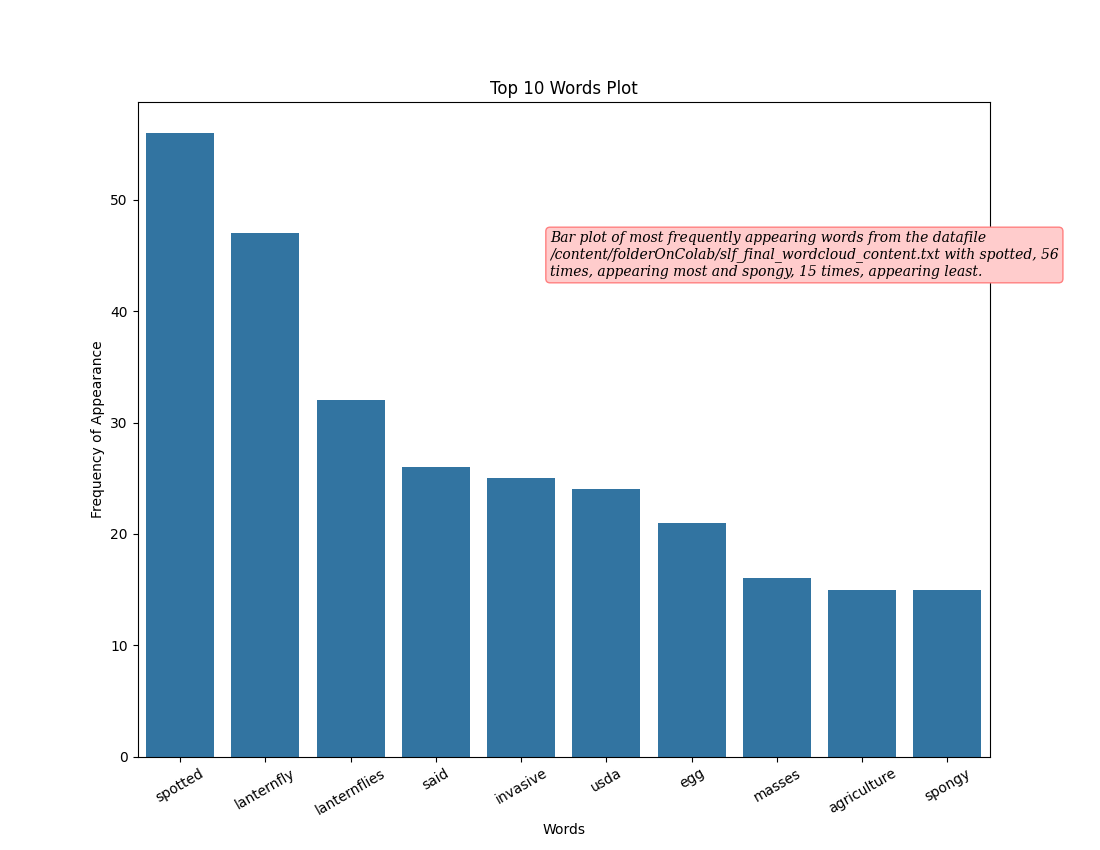 "Bar plot of most frequently appearing words from the datafile /content/folderOnColab/slf_final_wordcloud_content.txt with spotted, 56 times, appearing most and spongy, 15 times, appearing least.")

In [19]:
# Display Section 508 compliant image on the scrren with ALT text

try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
except (NameError, Exception) as e:
  process_exception(e)

In [20]:
plt.close();

# Example of Stem and Lemmatization

In [21]:
# Initialize variables for NLTK specific functions
wnl = WordNetLemmatizer()
stemmer = PorterStemmer()

# Example inflections to reduce
example_words = ["program","programming","programer","programs","programmed"]

# Perform stemming and lemmatization to show the differences
print("{0:20}{1:20}{2:20}".format("--Word--","--Stem--","--Lemma--"))

for word in example_words:
   print ("{0:20}{1:20}{2:20}".format(word, stemmer.stem(word), wnl.lemmatize(word, pos="v")))

--Word--            --Stem--            --Lemma--           
program             program             program             
programming         program             program             
programer           program             programer           
programs            program             program             
programmed          program             program             


# Stem and Lemmatization In Depth

## Stemming

**Stemming** is a technique used to reduce an inflected word down to its word stem. For example, the words “programming,” “programmer,” and “programs” can all be reduced down to the common word stem “program.” In other words, “program” can be used as a synonym for the prior three inflection words.

Performing this text-processing technique is often useful for dealing with sparsity and/or standardizing vocabulary. Not only does it help with reducing redundancy, as most of the time the word stem and their inflected words have the same meaning, it also allows NLP models to learn links between inflected words and their word stem, which helps the model understand their usage in similar contexts.

**Stemming** algorithms function by taking a list of frequent prefixes and suffixes found in inflected words and chopping off the end or beginning of the word. This can occasionally result in word stems that are not real words; thus, we can affirm this approach certainly has its pros, but it’s not without its limitations.

### Advantages of Stemming
Improved model performance: Stemming reduces the number of unique words that need to be processed by an algorithm, which can improve its performance. Additionally, it can also make the algorithm run faster and more efficiently.
Grouping similar words: Words with a similar meaning can be grouped together, even if they have distinct forms. This can be a useful technique in tasks such as document classification, where it’s important to identify key topics or themes within a document.

Easier to analyze and understand: Since stemming typically reduces the size of the vocabulary, it’s much easier to analyze, compare, and understand texts. This is helpful in tasks such as sentiment analysis, where the goal is to determine the sentiment of a document.

### Disadvantages of Stemming

Overstemming / False positives: This is when a stemming algorithm reduces separate inflected words to the same word stem even though they are not related; for example, the Porter Stemmer algorithm stems  "universal", "university", and "universe" to the same word stem. Though they are etymologically related, their meanings in the modern day are from widely different domains. Treating them as synonyms will reduce relevance in search results.

Understemming / False negatives: This is when a stemming algorithm reduces inflected words to different word stems, but they should be the same. For example, the Porter Stemmer algorithm does not reduce the words “alumnus,” “alumnae,” and “alumni” to the same word stem, although they should be treated as synonyms.

Language challenges: As the target language's morphology, spelling, and character encoding get more complicated, stemmers become more difficult to design; For example, an Italian stemmer is more complicated than an English stemmer because there is a higher number of verb inflections. A Russian stemmer is even more complex due to more noun declensions.

## Lemmatization

**Lemmatization** is another technique used to reduce inflected words to their root word. It describes the algorithmic process of identifying an inflected word’s “lemma” (dictionary form) based on its intended meaning.

As opposed to stemming, **lemmatization** relies on accurately determining the intended part-of-speech and the meaning of a word based on its context. This means it takes into consideration where the inflected word falls within a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

“Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma”

In other words, to lemmatize a document typically means to “doing things correctly” since it involves using a vocabulary and performing morphological analysis of words to remove only the inflectional ends and return the base or dictionary form of a word, which is known as the “lemma.” For example, you can expect a lemmatization algorithm to map “runs,” “running,” and “ran” to the lemma, “run.”  

### Advantages of Lemmatization

Accuracy: Lemmatization does not merely cut words off as you see in stemming algorithms. Analysis of words is conducted based on the word’s POS to take context into consideration when producing lemmas. Also, lemmatization leads to real dictionary words being produced.

### Disadvantages of Lemmatization

Time-consuming: Compared to stemming, lemmatization is a slow and time-consuming process. This is because lemmatization involves performing morphological analysis and deriving the meaning of words from a dictionary.

# Cloud Map with Stop words applied

In [22]:
# Word Cloud API Call with stopwords applied, resultant is an image.

# Note that you can add your own stop words as follows
# Create stopword list:
# STOPWORDS.update(["lantern", "beetle"])

try:
    #invoke the word cloud API using the original list of lowercase, alpha, > 2 character words.
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=IMG_BACKGROUND,
                          min_font_size=IMG_FONT_SIZE_MIN,
                          width=IMG_WIDTH,
                          height=IMG_HEIGHT,
                         ).generate(" ".join(wordlist))
except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud call as follows: {str(e)}")
    process_exception(e)

# Show the Results, turn the image into a graphic that is saved.
caption_text=f"""Image with a width of {IMG_WIDTH} by height of {IMG_HEIGHT} with a {IMG_BACKGROUND} background comprised of many different words like {all_fdist[0][0]} appearing largest, followed by {all_fdist[1][0]} and so forth."""
plt.figure(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
plt.imshow(wordcloud, interpolation=IMG_INTERP, alpha=IMG_ALPHA, aspect=IMG_ASPECT);
plt.axis('off');
plt.savefig(target_folder+os.sep+f"STEM-001_word_cloud_one{IMG_EXT}");
add_alt_text(target_folder+os.sep+f"STEM-001_word_cloud_one{IMG_EXT}", caption_text);
rprint(caption_text)

<Figure size 1100x850 with 0 Axes>

(-0.5, 1023.5, 767.5, -0.5)

Image with a width of 1024 by height of 768 with a black background comprised of many different words like spotted 
appearing largest, followed by lanternfly and so forth.

![](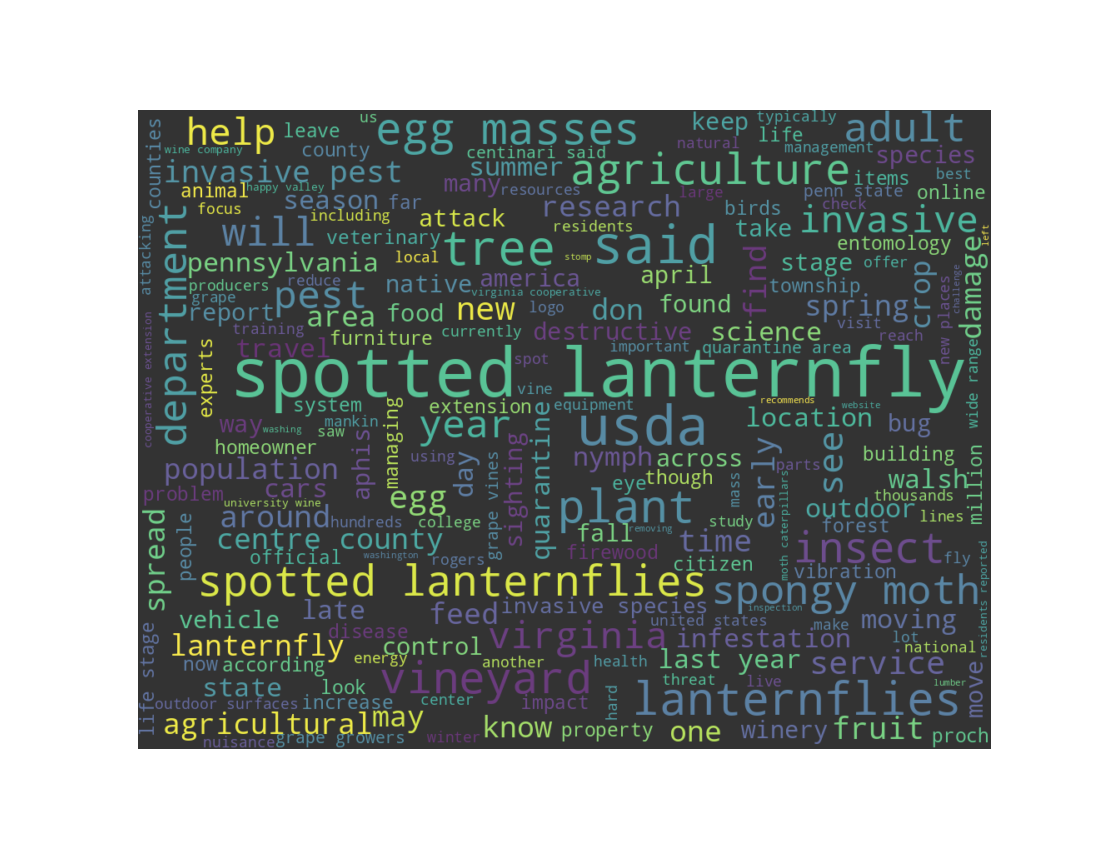 "Image with a width of 1024 by height of 768 with a black background comprised of many different words like spotted appearing largest, followed by lanternfly and so forth.")

In [23]:
# Display Section 508 compliant image on the scrren with ALT text for World Cloud Number One
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
except (NameError, Exception) as e:
  process_exception(e)


In [24]:
plt.close();

# Cloud Map without Stop Words Applied to Original Body of Text

In [25]:
# Second word cloud without stop words applied and a white background
try:
    IMG_BACKGROUND="white"
    wordcloud = WordCloud(
                          background_color=IMG_BACKGROUND,
                          min_font_size=IMG_FONT_SIZE_MIN,
                          width=IMG_WIDTH,
                          height=IMG_HEIGHT,
                         ).generate(data)

except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud() call as follows: {str(e)}")

#Show the Results, turn the image into a displayed graphic
caption_text=f"""Image with a width of {IMG_WIDTH} by height of {IMG_HEIGHT} with a {IMG_BACKGROUND} background comprised of many different words that are not uniformly organized nor set to lowercase."""
plt.figure(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
plt.imshow(wordcloud, interpolation=IMG_INTERP, alpha=IMG_ALPHA, aspect=IMG_ASPECT);
plt.axis('off');
plt.savefig(target_folder+os.sep+f"STEM-001_word_cloud_two{IMG_EXT}");
add_alt_text(target_folder+os.sep+f"STEM-001_word_cloud_two{IMG_EXT}", caption_text);
rprint(caption_text)

<Figure size 1100x850 with 0 Axes>

(-0.5, 1023.5, 767.5, -0.5)

Image with a width of 1024 by height of 768 with a white background comprised of many different words that are not 
uniformly organized nor set to lowercase.

![](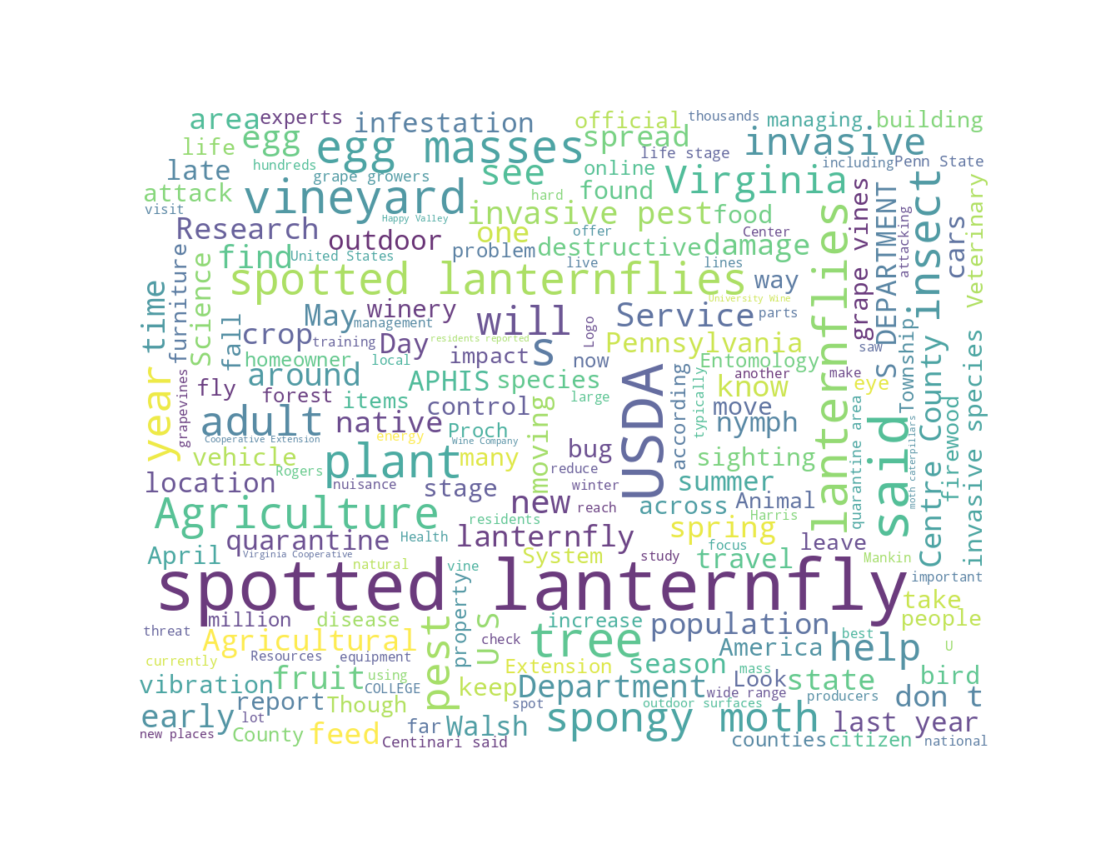 "Image with a width of 1024 by height of 768 with a white background comprised of many different words that are not uniformly organized nor set to lowercase.")

In [26]:
# Display Section 508 compliant image on the scrren with ALT text for World Cloud Number Two, minus stop words (all text)
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
except (NameError, Exception) as e:
  process_exception(e)

In [27]:
plt.close();

In [28]:
# Identify and download some masks that will be used to force the word cloud into a specific shape

masks=["usfs_mask.jpg", "slf_mask.jpg", "force_mask.jpg", "kitty_mask.jpg", "pine_tree_mask.png", "paw_mask.jpg"]
if os.path.isdir(target_folder):
  for idx, filename in enumerate(masks):
    rprint(f"Copying {filename} to target folder: {target_folder}")
    try:
      subprocess.run(["gsutil", "-m" , "cp", "-r", f"gs://{BUCKET_NAME}/training-data/llm/masks/{filename}",  target_folder], check=True)
    except (subprocess.CalledProcessError, Exception) as e:
      process_exception(e)
else:
    rprint("ERROR: Local folder not found/created.  Check the output to ensure your folder is created.")
    rprint(f"...target folder: {target_folder}")
    rprint("...if you can't find the problem contact the instructor.")


Copying usfs_mask.jpg to target folder: /content/folderOnColab

CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/llm/masks/usfs_mask.jpg', '/content/folderOnColab'], returncode=0)

Copying slf_mask.jpg to target folder: /content/folderOnColab

CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/llm/masks/slf_mask.jpg', '/content/folderOnColab'], returncode=0)

Copying force_mask.jpg to target folder: /content/folderOnColab

CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/llm/masks/force_mask.jpg', '/content/folderOnColab'], returncode=0)

Copying kitty_mask.jpg to target folder: /content/folderOnColab

CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/llm/masks/kitty_mask.jpg', '/content/folderOnColab'], returncode=0)

Copying pine_tree_mask.png to target folder: /content/folderOnColab

CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/llm/masks/pine_tree_mask.png', '/content/folderOnColab'], returncode=0)

Copying paw_mask.jpg to target folder: /content/folderOnColab

CompletedProcess(args=['gsutil', '-m', 'cp', '-r', 'gs://cio-training-vertex-colab/training-data/llm/masks/paw_mask.jpg', '/content/folderOnColab'], returncode=0)

Processing...usfs_mask.jpg
Processing...slf_mask.jpg
Processing...force_mask.jpg
Processing...kitty_mask.jpg
Processing...pine_tree_mask.png
Processing...paw_mask.jpg


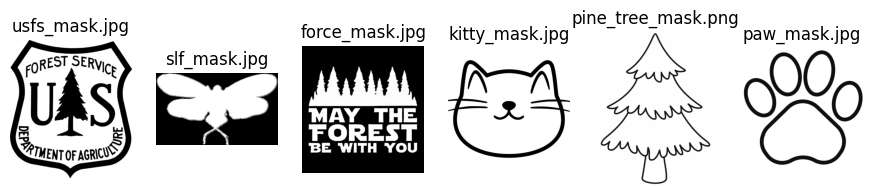

In [29]:
%matplotlib inline
# Images, Mask loading and setup, setup the plot mechanism to show the images.

rows=1
cols=6
position=1
img_ary=[]
fig = plt.figure(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT));


# loop through the lists and print them side by side
for idx, filename in enumerate(masks):
    print(f"Processing...{filename}")
    bit_bucket=fig.add_subplot(rows,cols, position);
    img_ary.append(PIL_Image.open(target_folder+os.sep+filename));
    # showing image
    bit_bucket=plt.imshow(img_ary[idx]);
    bit_bucket=plt.axis('off');
    bit_bucket=plt.title(os.path.basename(filename));
    # Adds a subplot at the next position
    position += 1;

In [30]:
plt.close();

# With a Mask

Note that the "mask" is effectively an image of same size that's black and white.  Blacked out portions become the area you can populate so I took the USFS logo, inverted so the white becomes black and filled in the verbiage there.

Next I paste the transparent PNG on top of the original logo thus putting the words in the middle.

In [31]:
# Mask loading and setup

# Use the 'Agg' backend for non-interactive environments
matplotlib.use('Agg')

#choose a different mask if you want different results, options are: usfs_mask.jpg, slf_mask.jpg, force_mask.jpg, kitty_mask.jpg, pine_tree_mask.png, paw_mawk.jpg
target_filename="usfs_mask.jpg"                        #<- change here
the_logo=PIL_Image.open(target_folder+os.sep+target_filename)

try:
    #invert the colors of the mask image, so that the image is "reversed"
    inverted_image = PIL.ImageOps.invert(the_logo)
    # Convert the image to a numeric representation (a 3D array)
    the_mask = np.array(inverted_image)
except Exception as e:
    print(f"ERROR detected trying read the mask image and invert the colors call as follows: {str(e)}")


# Data Marshaling from original filtered list, meaning stopwords applied
data = " ".join(filtered_list)

########################################
#API Call
########################################
try:
    wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      mode="RGBA",
                      #critical this be None to ensure merging with the transparency mask
                      background_color=None,
                      #background_color=IMG_BACKGROUND,
                      min_font_size=IMG_FONT_SIZE_MIN,
                      width=IMG_WIDTH,
                      height=IMG_HEIGHT,
                      mask=the_mask,
                     ).generate(" ".join(wordlist))
    the_image= wordcloud.to_image()

except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud() call as follows: {str(e)}")

#turn the image into a displayed graphic
caption_text=f"""Image with a width of {IMG_WIDTH} by height of {IMG_HEIGHT} with a {IMG_BACKGROUND} background comprised of rationalized words with your mask, {target_filename}, pushing words out of the way of that shape."""
plt.figure(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
plt.imshow(the_image, interpolation=IMG_INTERP, alpha=IMG_ALPHA, aspect=IMG_ASPECT);
plt.axis('off');
plt.savefig(target_folder+os.sep+f"STEM-001_word_merged{IMG_EXT}");
add_alt_text(target_folder+os.sep+f"STEM-001_word_merged{IMG_EXT}", caption_text);
rprint(caption_text)

<Figure size 1100x850 with 0 Axes>

(-0.5, 959.5, 1084.5, -0.5)

Image with a width of 1024 by height of 768 with a white background comprised of rationalized words with your mask,
usfs_mask.jpg, pushing words out of the way of that shape.

![](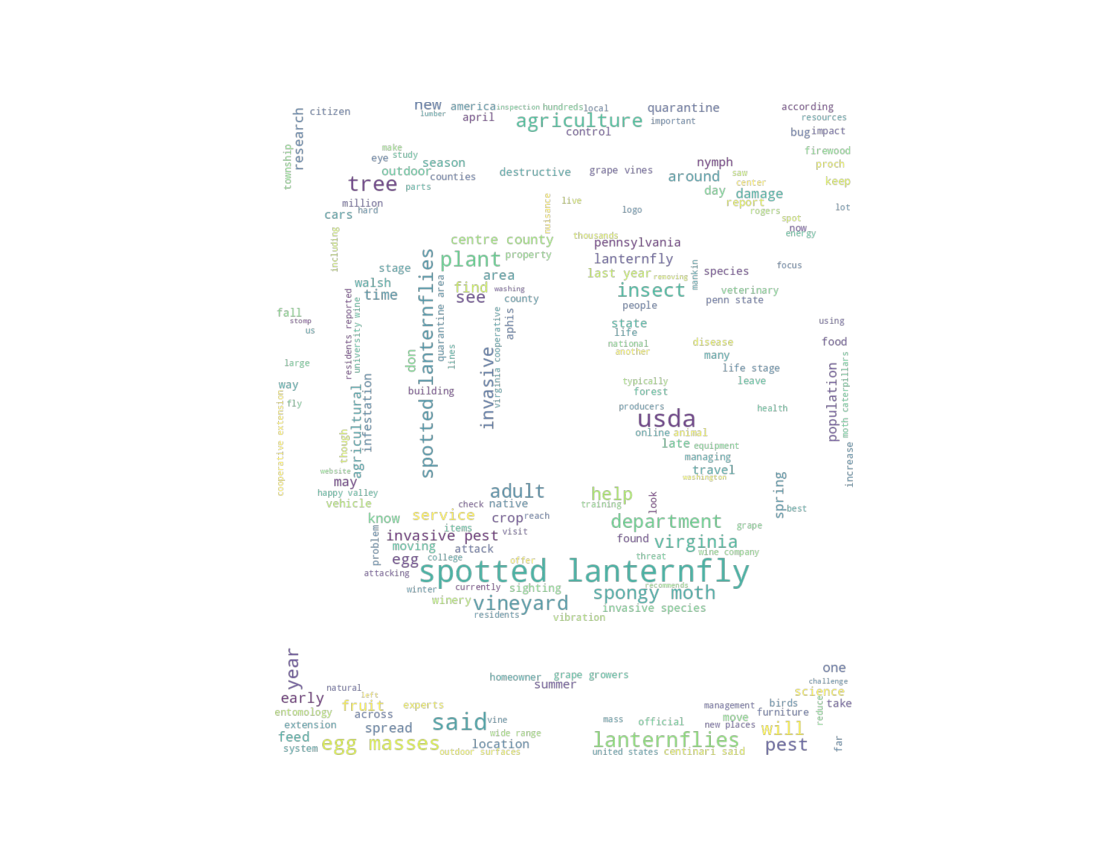 "Image with a width of 1024 by height of 768 with a white background comprised of rationalized words with your mask, usfs_mask.jpg, pushing words out of the way of that shape.")

In [32]:
# Display Section 508 compliant image on the scrren with ALT text for World Cloud Number Two, minus stop words (all text)
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
except (NameError, Exception) as e:
  process_exception(e)

In [33]:
plt.close();

# Merge the Images into a single instance

You might want to try another image and text block on your own.

In [34]:
# creating a image object (main image)
im1=the_logo
im2=the_image
alpha = im2.getchannel('A')

#transparency save
im1.paste(im2, (0,0), im2)

the_final_image=im1

caption_text=f"""Image with a width of {IMG_WIDTH} by height of {IMG_HEIGHT} with a {IMG_BACKGROUND} background comprised of rationalized words with your mask, {target_filename}, pushing words out of the way of that shape showing the actual mask."""
plt.figure(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
plt.imshow(the_final_image, interpolation="bilinear", alpha=0.8, aspect="equal");
plt.axis('off');
plt.savefig(target_folder+os.sep+f"STEM-001_word_final{IMG_EXT}");
add_alt_text(target_folder+os.sep+f"STEM-001_word_final{IMG_EXT}", caption_text);

![](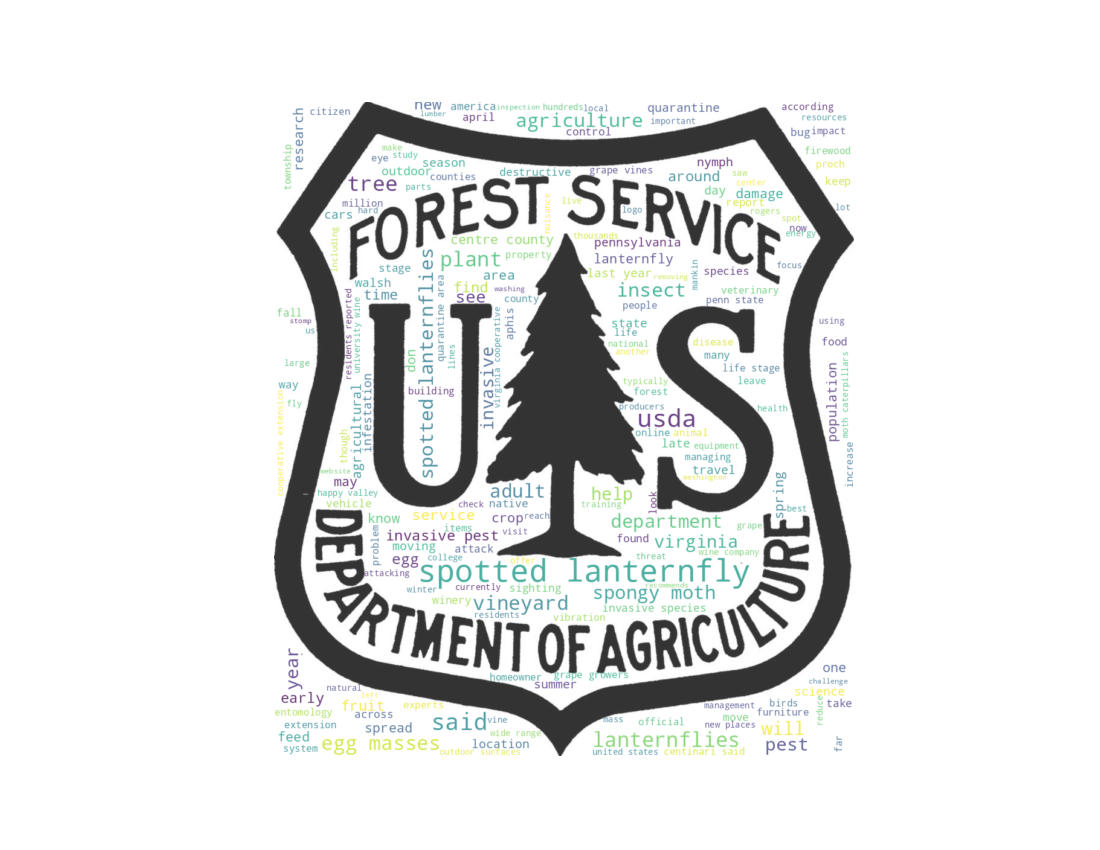 "Image with a width of 1024 by height of 768 with a white background comprised of rationalized words with your mask, usfs_mask.jpg, pushing words out of the way of that shape showing the actual mask.")

In [35]:
# Display Section 508 compliant image on the scrren with ALT text for World Cloud Number Two, minus stop words (all text)
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
except (NameError, Exception) as e:
  process_exception(e)

In [36]:
plt.close();

# Advanced Assignments

## Utilize NLP techniques to process your own data

+ Select one of the data filenames and read-in a different filename.
+ Observe the word frequency, stop word influence on size of data, stemming, and lemmatization results.
+ Observe the differences in the Word Cloud
+ Change the mask used to a different one and create a final output.

## Uber-Challenge
+ Load the Spotted Lantern Fly data file and the Eastern LongHorn Beetle data files either separately or joined together.
+ Repeat the experiment to see the influence of the new data.

## Pro-Tip:

Either create a new block of code that reads the 2nd file and combine the resulting variables `data = data_slf + " " + data_alb` or create an array, iterate through the target files and combine them.

## Webpage Scraping

In [37]:
# Example of getting data from a URL

# web interaction libraries
import requests
import urllib.request
from urllib.request import urlopen
import io
import ssl

# web scraper
from bs4 import BeautifulSoup

# word cloud (extras)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Read a web page, web scraping
url="https://www.usfa.fema.gov/wui/outreach/wildfire-evacuation.html"
target_folder="/content/folderOnColab"
target_filename="STEM-001-advanced-webpage.html"
target_file=target_folder+os.sep+target_filename

# Download the data file locally and save to file
the_request = requests.get(url, allow_redirects=True);
open(target_file, 'wb').write(the_request.content);

# Create a context with default certificates
context = ssl.create_default_context()

# Create a context with disabled verification
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE

rprint(f"Access the URL provided ({url})")

# open the connection
the_page=urlopen(url, context=context);
soup = BeautifulSoup(the_page, 'html.parser');

#OR

the_page = requests.get(url).content;
soup = BeautifulSoup(the_page, 'html.parser');

#OR read the local download

# check for the file's existence
if os.path.isfile(target_file):
  #open the file, read the contents and close the file
  try:
    with open(target_file, "r", encoding="utf-8") as my_file:
        #the_page=my_file.read();
        soup = BeautifulSoup(my_file, 'html.parser');
  except (FileNotFoundError,PermissionError,IOError,UnicodeDecodeError, Exception) as e:
    process_exception(e)
else:
    rprint("ERROR: File not found.  Check the previous code block to ensure you file copied.")
    rprint(f"...target file: {target_file}")
    rprint("...if you can't find the problem contact the instructor.")


rprint("Find all headers.")
titles = soup.findAll(re.compile('^h[1-4]'))

print("")
the_titles=[]
print(f"{BOLD_START}Article Titles{BOLD_END}")
stop_words = set(stopwords.words("english"))
for title in titles:
    rprint(title.text)
    word_token_response=word_tokenize(title.text.lower())
    wordlist = [x for x in word_token_response if (len(x)>=2 and x.isalpha())]
    for word in wordlist:
      if word.casefold() not in stop_words:
         the_titles.append(word)
print("")

# To see the whole page (it's a lot)
#print(soup.prettify())

# Download custom mask
url="https://cdn.pixabay.com/photo/2022/05/29/11/36/fire-7228995_1280.png"
target_folder="/content/folderOnColab"
target_filename="fire_mask.png"
target_mask_file=target_folder+os.sep+target_filename

# Mask loading and setup
# Download the data file locally and save to file
# Reference: https://www.datacamp.com/tutorial/wordcloud-python
# Reference: https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b

rprint("Downloading and saving a fire graphic mask.")
the_request = requests.get(url, allow_redirects=True);
open(target_mask_file, 'wb').write(the_request.content);

# Use the 'Agg' backend for non-interactive environments
matplotlib.use('Agg')

rprint("Loading fire mask.")
the_mask=PIL_Image.open(target_mask_file);
the_original_mask= np.array(PIL_Image.open(target_mask_file));
the_transformed_mask = np.array(PIL_Image.open(target_mask_file));

#the_transformed_mask[the_transformed_mask == 255] = 0
the_transformed_mask[the_transformed_mask == 0 ] = 255;


try:
  rprint("Invoke the Word Cloud API using the fire mask.")
  wordcloud_fire = WordCloud(
                             stopwords=STOPWORDS,
                             mode="RGBA",
                             background_color=None,
                             min_font_size=IMG_FONT_SIZE_MIN,
                             width=IMG_WIDTH,
                             height=IMG_HEIGHT,
                             mask=the_transformed_mask
                            ).generate(" ".join(the_titles))

  rprint("Create coloring from image.")
  image_colors = ImageColorGenerator(the_original_mask)

  rprint("Align colors of words with colors in mask.")
  wordcloud_fire.recolor(color_func=image_colors)

  rprint("Save mask to an image.")
  the_image= wordcloud_fire.to_image()

except Exception as e:
    process_exception(e)

# creating a image object (main image)
im1=the_mask
im2=the_image
alpha = im2.getchannel('A')

#transparency save
im1.paste(im2, (0,0), im2)

the_final_image=im1

#turn the image into a displayed graphic
plt.close() #clear the slate of prior images
caption_text=f"""Image with a width of {IMG_WIDTH} by height of {IMG_HEIGHT} with a {IMG_BACKGROUND} background comprised of rationalized words from your downloaded file shaped like a fire."""
plt.figure(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
plt.imshow(
    the_final_image,
    interpolation=IMG_INTERP,
    alpha=1.0,
    aspect=IMG_ASPECT,
    );
plt.axis('off');
plt.savefig(target_folder+os.sep+f"STEM-001_advanced_webpage{IMG_EXT}");
add_alt_text(target_folder+os.sep+f"STEM-001_advanced_webpage{IMG_EXT}", caption_text);

Access the URL provided (https://www.usfa.fema.gov/wui/outreach/wildfire-evacuation.html)

Find all headers.


Article Titles


Wildfire Evacuation

Pre-fire: Plan, prepare and practice before a wildfire occurs.

Plan

Planning for roadway safety during wildfire evacuations

Prepare

Creating community safe zones

Practice

During a wildfire event

After evacuating safely, tell residents to:

Outreach content to share with your community

Create a wildfire evacuation plan

Evacuation checklist

Communications plan checklist

Emergency supply checklist

After a wildfire

Downloading and saving a fire graphic mask.

Loading fire mask.

Invoke the Word Cloud API using the fire mask.

Create coloring from image.

Align colors of words with colors in mask.

Save mask to an image.

![](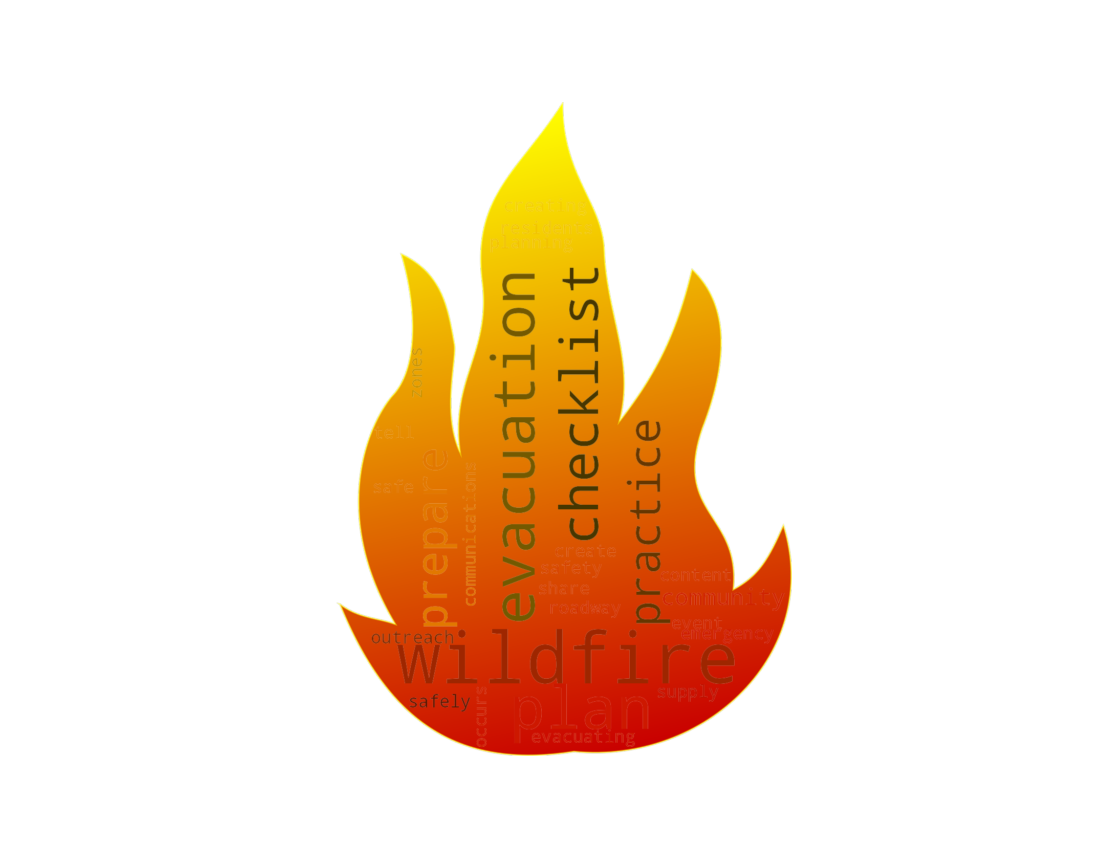 "Image with a width of 1024 by height of 768 with a white background comprised of rationalized words from your downloaded file shaped like a fire.")

In [38]:
# Display Section 508 compliant image on the scrren with ALT text for World Cloud Number Two, minus stop words (all text)
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
except (NameError, Exception) as e:
  process_exception(e)

## Portable Document Format (PDF) Read

In [39]:
# PDF library
import pymupdf


# Read a Portable Document Format (PDF)
url="https://www.epa.gov/sites/default/files/2021-04/documents/wildfires_td.pdf"
target_folder="/content/folderOnColab"
target_filename="STEM-001-advanced-pdf.pdf"
target_file=target_folder+os.sep+target_filename

# Download the data file locally and save to file
rprint(f"Access the URL provided ({url}) and save to a local file.")
the_request = requests.get(url, allow_redirects=True);
open(target_file, 'wb').write(the_request.content);

# Create a context with default certificates
context = ssl.create_default_context()

# Create a context with disabled verification
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE
"""
the_request = requests.get(url)
with open(target_file, 'wb') as fd:
     fd.write(response.content)
"""
rprint("Now read the local file and harvest the data from the PDF.")
# check for the file's existence
if os.path.isfile(target_file):
  #open the file, read the contents and close the file
  try:
      doc = pymupdf.open(target_file)
      total_text=""
      rprint("...processing each page of the document.")
      total_text = chr(12).join([page.get_text() for page in doc])

  except (FileNotFoundError,PermissionError,IOError,UnicodeDecodeError, Exception) as e:
    process_exception(e)
else:
    rprint("ERROR: File not found.  Check the previous code block to ensure you file copied.")
    rprint(f"...target file: {target_file}")
    rprint("...if you can't find the problem contact the instructor.")

print("")
rprint("Process the text from the PDF.")
filtered_list=[]
stop_words = set(stopwords.words("english"))
word_token_response=word_tokenize(total_text.lower())
wordlist = [x for x in word_token_response if (len(x)>=2 and x.isalpha())]
for word in wordlist:
  if word.casefold() not in stop_words:
     filtered_list.append(word)
print("")

# Download custom mask
url="https://cdn.pixabay.com/photo/2022/05/29/11/36/fire-7228995_1280.png"
target_folder="/content/folderOnColab"
target_filename="fire_mask.png"
target_mask_file=target_folder+os.sep+target_filename

# Mask loading and setup
# Download the data file locally and save to file
# Reference: https://www.datacamp.com/tutorial/wordcloud-python
# Reference: https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b

rprint("Downloading and saving a fire graphic mask.")
the_request = requests.get(url, allow_redirects=True);
open(target_mask_file, 'wb').write(the_request.content);

# Use the 'Agg' backend for non-interactive environments
matplotlib.use('Agg')

rprint("Loading fire mask.")
the_mask=PIL_Image.open(target_mask_file);
the_original_mask= np.array(PIL_Image.open(target_mask_file));
the_transformed_mask = np.array(PIL_Image.open(target_mask_file));

#the_transformed_mask[the_transformed_mask == 255] = 0
the_transformed_mask[the_transformed_mask == 0 ] = 255;


try:
  rprint("Invoke the Word Cloud API using the fire mask.")
  wordcloud_fire = WordCloud(
                             stopwords=STOPWORDS,
                             mode="RGBA",
                             background_color=None,
                             min_font_size=IMG_FONT_SIZE_MIN,
                             width=IMG_WIDTH,
                             height=IMG_HEIGHT,
                             mask=the_transformed_mask
                            ).generate(" ".join(filtered_list))

  rprint("Create coloring from image.")
  image_colors = ImageColorGenerator(the_original_mask)

  rprint("Align colors of words with colors in mask.")
  wordcloud_fire.recolor(color_func=image_colors)

  rprint("Save mask to an image.")
  the_image= wordcloud_fire.to_image()

except Exception as e:
    process_exception(e)

# creating a image object (main image)
im1=the_mask
im2=the_image
alpha = im2.getchannel('A')

#transparency save
im1.paste(im2, (0,0), im2)

the_final_image=im1

#turn the image into a displayed graphic
plt.close() #clear the slate of prior images
caption_text=f"""Image with a width of {IMG_WIDTH} by height of {IMG_HEIGHT} with a {IMG_BACKGROUND} background comprised of rationalized words from your downloaded file shaped like a fire."""
plt.figure(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
plt.imshow(
    the_final_image,
    interpolation=IMG_INTERP,
    alpha=1.0,
    aspect=IMG_ASPECT,
    );
plt.axis('off');
plt.savefig(target_folder+os.sep+f"STEM-001_advanced_webpage{IMG_EXT}");
add_alt_text(target_folder+os.sep+f"STEM-001_advanced_webpage{IMG_EXT}", caption_text);


Access the URL provided (https://www.epa.gov/sites/default/files/2021-04/documents/wildfires_td.pdf) and save to a 
local file.

Now read the local file and harvest the data from the PDF.

...processing each page of the document.

Process the text from the PDF.

Downloading and saving a fire graphic mask.

Loading fire mask.

Invoke the Word Cloud API using the fire mask.

Create coloring from image.

Align colors of words with colors in mask.

Save mask to an image.

![](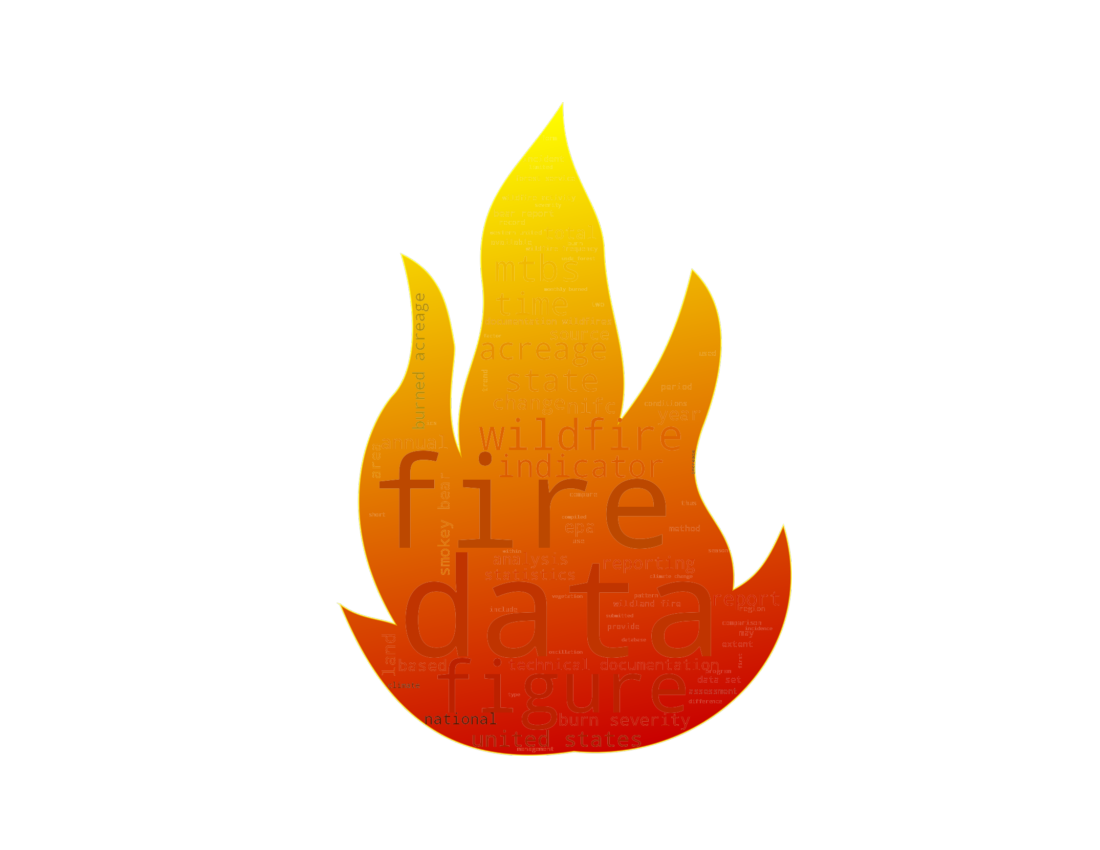 "Image with a width of 1024 by height of 768 with a white background comprised of rationalized words from your downloaded file shaped like a fire.")

In [40]:
# Display Section 508 compliant image on the scrren with ALT text for World Cloud Number Two, minus stop words (all text)
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
except (NameError, Exception) as e:
  process_exception(e)

## Let's Talk ScatterText

A tool for finding distinguishing terms in corpora and displaying them in an interactive HTML scatter plot. Points corresponding to terms are selectively labeled so that they don't overlap with other labels or points.

Reference: https://github.com/JasonKessler/scattertext

In [41]:
import scattertext as st

df = st.SampleCorpora.ConventionData2012.get_data().assign(
    parse=lambda df: df.text.apply(st.whitespace_nlp_with_sentences)
)

df

party                                               text  \
0      democrat  Thank you. Thank you. Thank you. Thank you so ...   
1      democrat  Thank you so much. Tonight, I am so thrilled a...   
2      democrat  Thank you. It is a singular honor to be here t...   
3      democrat  Hey, Delaware. \nAnd my favorite Democrat, Jil...   
4      democrat  Hello. \nThank you, Angie. I'm so proud of how...   
..          ...                                                ...   
184  republican  As the elected leader of 250,000 College Repub...   
185  republican  Good afternoon. I'm Pete Sessions, a congressm...   
186  republican  To Chairman Priebus and to my fellow Americans...   
187  republican  \nAbsolutely. Thank you, Mr.Chairman.\nWelcome...   
188  republican  I am thrilled to add Utah's voice in support f...   

            speaker                                              parse  
0      BARACK OBAMA  (thank, you, ., thank, you, ., thank, you, ., ...  
1    MICHELLE OBAMA                          (thank, you, so, much, .)  
2    RICHARD DURBIN  (thank, you, ., it, is, a, singular, honor, to...  
3      JOSEPH BIDEN  (hey, ,, delaware, ., and, my, favorite, democ...  
4        JILL BIDEN  (hello, ., thank, you, ,, angie, ., i, ', m, s...  
..              ...                                                ...  
184   ALEX SCHRIVER  (as, the, elected, leader, of, 250, ,, 000, co...  
185   PETE SESSIONS  (good, afternoon, ., i, ', m, pete, sessions, ...  
186    BOB BUCKHORN  (to, chairman, priebus, and, to, my, fellow, a...  
187      SHARON DAY  (absolutely, ., thank, you, ,, mr, ., chairman...  
188        MIA LOVE  (i, am, thrilled, to, add, utah, ', s, voice, ...  

[189 rows x 4 columns]

In [42]:
corpus = st.CorpusFromParsedDocuments(
                                       df,
                                       category_col='party',
                                       parsed_col='parse'
                                      ).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

In [43]:
html = st.produce_scattertext_explorer(
    corpus,
    category='democrat',
    category_name='Democratic',
    not_category_name='Republican',
    minimum_term_frequency=0,
    pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    metadata=corpus.get_df()['speaker'],
    transform=st.Scalers.dense_rank,
    #include_gradient=True,
    #left_gradient_term='More Republican',
    #middle_gradient_term='Metric: Dense Rank Difference',
    #right_gradient_term='More Democratic',
)

In [44]:
target_filename="/content/folderOnColab/scattertext_demo.html"
try:
  with open(target_filename, "w", encoding="UTF-8") as my_file:
      my_file.write(html)
except (FileNotFoundError,PermissionError,IOError,UnicodeDecodeError, Exception) as e:
  process_exception(e)

1664109

In [45]:
from IPython.display import HTML
#HTMLDisplay (filename=target_filename)
HTML(html)

## Let's Talk spaCy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

If you’re working with a lot of text, you’ll eventually want to know more about it. For example, what’s it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

**Features**:

+ Non-destructive tokenization
+ Named entity recognition
+ Support for 63+ languages
+ 46 statistical models for 16 languages
+ Pretrained word vectors
+ State-of-the-art speed
+ Easy deep learning integration
+ Part-of-speech tagging
+ Labelled dependency parsing
+ Syntax-driven sentence segmentation
+ Built in visualizers for syntax and NER
+ Convenient string-to-hash mapping
+ Export to numpy data arrays
+ Efficient binary serialization
+ Easy model packaging and deployment
+ Robust, rigorously evaluated accuracy

Reference:
+ https://v2.spacy.io/
+ https://v2.spacy.io/usage/examples
+ https://spacy.io/usage


In [46]:
rprint("Make sure spaCy is installed.")

# Encountered problems in session where GPU was utilized and System encoding, in session, changes to ANSI*, normalize back to UTF-8
locale.getpreferredencoding = getpreferredencoding

# Identify the libraries you'd like to add to this Runtime environment.
libraries=["spacy",]

# Loop through each library and test for existence, if not present install quietly
for library in libraries:
    if library == "Pillow":
      spec = importlib.util.find_spec("PIL")
    else:
      spec = importlib.util.find_spec(library)
    if spec is None:
      print("Installing library " + library)
      subprocess.run(["pip", "install" , library, "--quiet"], check=True)
    else:
      print("Library " + library + " already installed.")

Make sure spaCy is installed.

Library spacy already installed.


In [47]:
# Import spaCy libraries
import spacy
from spacy.language import Language
from spacy.tokens import Doc
from spacy.matcher import Matcher
from spacy import displacy
from spacy.tokens import Span
from collections import Counter

In [48]:
# Setup SpaCy model (load)
#SPACY_MODEL_NAME="en_core_web_trf"
SPACY_MODEL_NAME="en_core_web_lg"

rprint("Attempt to utilize GPU's over CPU's.")
try:
    spacy.prefer_gpu()
except Exception as e:
    #no gpu available will default to CPU
    rprint(f"GPU not utilized by SpaCy, see exception: {e}")
    pass

print("")
rprint(f"Load the following model: {SPACY_MODEL_NAME}.")
try:
    nlp =spacy.load(SPACY_MODEL_NAME)
except Exception as e:
    process_exception(e)
    rprint("Unable to load your model, performing a download instead.")
    #!python -m spacy download {SPACY_MODEL}
    subprocess.run(["python", "-m" , "spacy", "download", SPACY_MODEL_NAME])
    pass  #we want to download not cause a problem.
finally:
    rprint("Now load that model.")
    nlp =spacy.load(SPACY_MODEL_NAME)

Attempt to utilize GPU's over CPU's.

True

Load the following model: en_core_web_lg.

OSError("[E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data
directory.")

Unable to load your model, performing a download instead.

CompletedProcess(args=['python', '-m', 'spacy', 'download', 'en_core_web_lg'], returncode=0)

Now load that model.

In [49]:
body_of_text="The mission of the United States Forest Service is to maintain the health, diversity, and productivity of the country's forests and grasslands for the benefit of current and future generations. The Forest Service manages the country's national forests for a variety of uses, including: recreation, timber, wilderness, minerals, water, grazing, fish, and wildlife. The Forest Service's mission is captured in the phrase: Caring for the Land and Serving People."

# Use the spaCy visualizer to "see" the sentence structure
# Reference: https://spacy.io/usage/visualizers#jupyter
doc = nlp(body_of_text)

### Word Frequency (Topic Analysis Start Point)

In [50]:
# Remove stop words and punctuation symbols
words = [token.text for token in doc if not token.is_stop and not token.is_punct]
word_freq = Counter(words)

# 5 commonly occurring words with their frequencies
print(f"{BOLD_START}Common Words{BOLD_END}")
common_words = word_freq.most_common(5)
rprint(common_words)

# Unique words
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print("")
print(f"{BOLD_START}Unique Words{BOLD_END}")
rprint(unique_words)

Common Words


[('Forest', 3), ('Service', 3), ('mission', 2), ('country', 2), ('forests', 2)]


Unique Words


[
    'United',
    'States',
    'maintain',
    'health',
    'diversity',
    'productivity',
    'grasslands',
    'benefit',
    'current',
    'future',
    'generations',
    'manages',
    'national',
    'variety',
    'uses',
    'including',
    'recreation',
    'timber',
    'wilderness',
    'minerals',
    'water',
    'grazing',
    'fish',
    'wildlife',
    'captured',
    'phrase',
    'Caring',
    'Land',
    'Serving',
    'People'
]

### Linguistic Annotations

In [51]:
#displacy.render(doc, style="dep")
sentence_spans = list(doc.sents)
displacy.render(sentence_spans, style="dep")

In [52]:
# Look at the text as entities
displacy.render(doc, style="ent")

### Entity Detection

Entity detection is a more advanced form of language processing. ED identifies entities in a sentence such as specific locations (GPE), date-related words (DATE), important numbers (CARDINAL), and specific individuals (PERSON) within an input string of text. It is helpful when you want to identify key information from text.

We use the property label to grab a label for each entity that has been detected in the text. You can also visualize those entities in spaCy‘s displaCy visualizer.

In [53]:
# Look at how content spans the data
doc.spans["sc"] = [
    Span(doc, 3, 6, "ORG"),
    Span(doc, 5, 6, "GPE"),
]

displacy.render(doc, style="span")

### Part-Of-Speech (POS) Tagging

Part of speech (POS) analyzes the grammatical role each word plays in a sentence. In other words, it determines to which category each word (Noun, Pronoun, Adjective, Verb, Adverb, Preposition, Conjunction, and interjection) belongs. POS tags are useful when you want to assign a syntactic category to each word of the text for future analysis.

In [54]:
# Show a table of entity types
print(f"""{BOLD_START}{"Word":20}| {"Lemma":20}| {"POS":10}| {"Tag":10}| {"Dep":10}| {"Shape":10}| {"IsAlpha?":10}| {"Stop Word":10}{BOLD_END}""")

for token in doc:
    rprint(f"""{token.text:20}| {token.lemma_:20}| {token.pos_:10}| {token.tag_:10}| {token.dep_:10}| {token.shape_:10}| {token.is_alpha:10}| {token.is_stop:10}| """)


Word                | Lemma               | POS       | Tag       | Dep       | Shape     | IsAlpha?  | Stop Word 


The                 | the                 | DET       | DT        | det       | Xxx       |          1|          1|

mission             | mission             | NOUN      | NN        | nsubj     | xxxx      |          1|          0|

of                  | of                  | ADP       | IN        | prep      | xx        |          1|          1|

the                 | the                 | DET       | DT        | det       | xxx       |          1|          1|

United              | United              | PROPN     | NNP       | compound  | Xxxxx     |          1|          0|

States              | States              | PROPN     | NNP       | compound  | Xxxxx     |          1|          0|

Forest              | Forest              | PROPN     | NNP       | compound  | Xxxxx     |          1|          0|

Service             | Service             | PROPN     | NNP       | pobj      | Xxxxx     |          1|          0|

is                  | be                  | AUX       | VBZ       | ROOT      | xx        |          1|          1|

to                  | to                  | PART      | TO        | aux       | xx        |          1|          1|

maintain            | maintain            | VERB      | VB        | xcomp     | xxxx      |          1|          0|

the                 | the                 | DET       | DT        | det       | xxx       |          1|          1|

health              | health              | NOUN      | NN        | dobj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

diversity           | diversity           | NOUN      | NN        | conj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

and                 | and                 | CCONJ     | CC        | cc        | xxx       |          1|          1|

productivity        | productivity        | NOUN      | NN        | conj      | xxxx      |          1|          0|

of                  | of                  | ADP       | IN        | prep      | xx        |          1|          1|

the                 | the                 | DET       | DT        | det       | xxx       |          1|          1|

country             | country             | NOUN      | NN        | poss      | xxxx      |          1|          0|

's                  | 's                  | PART      | POS       | case      | 'x        |          0|          1|

forests             | forest              | NOUN      | NNS       | pobj      | xxxx      |          1|          0|

and                 | and                 | CCONJ     | CC        | cc        | xxx       |          1|          1|

grasslands          | grassland           | NOUN      | NNS       | conj      | xxxx      |          1|          0|

for                 | for                 | ADP       | IN        | prep      | xxx       |          1|          1|

the                 | the                 | DET       | DT        | det       | xxx       |          1|          1|

benefit             | benefit             | NOUN      | NN        | pobj      | xxxx      |          1|          0|

of                  | of                  | ADP       | IN        | prep      | xx        |          1|          1|

current             | current             | ADJ       | JJ        | amod      | xxxx      |          1|          0|

and                 | and                 | CCONJ     | CC        | cc        | xxx       |          1|          1|

future              | future              | ADJ       | JJ        | conj      | xxxx      |          1|          0|

generations         | generation          | NOUN      | NNS       | pobj      | xxxx      |          1|          0|

.                   | .                   | PUNCT     | .         | punct     | .         |          0|          0|

The                 | the                 | DET       | DT        | det       | Xxx       |          1|          1|

Forest              | Forest              | PROPN     | NNP       | compound  | Xxxxx     |          1|          0|

Service             | Service             | PROPN     | NNP       | nsubj     | Xxxxx     |          1|          0|

manages             | manage              | VERB      | VBZ       | ROOT      | xxxx      |          1|          0|

the                 | the                 | DET       | DT        | det       | xxx       |          1|          1|

country             | country             | NOUN      | NN        | poss      | xxxx      |          1|          0|

's                  | 's                  | PART      | POS       | case      | 'x        |          0|          1|

national            | national            | ADJ       | JJ        | amod      | xxxx      |          1|          0|

forests             | forest              | NOUN      | NNS       | dobj      | xxxx      |          1|          0|

for                 | for                 | ADP       | IN        | prep      | xxx       |          1|          1|

a                   | a                   | DET       | DT        | det       | x         |          1|          1|

variety             | variety             | NOUN      | NN        | pobj      | xxxx      |          1|          0|

of                  | of                  | ADP       | IN        | prep      | xx        |          1|          1|

uses                | use                 | NOUN      | NNS       | pobj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

including           | include             | VERB      | VBG       | prep      | xxxx      |          1|          0|

:                   | :                   | PUNCT     | :         | punct     | :         |          0|          0|

recreation          | recreation          | NOUN      | NN        | pobj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

timber              | timber              | NOUN      | NN        | conj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

wilderness          | wilderness          | NOUN      | NN        | conj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

minerals            | mineral             | NOUN      | NNS       | conj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

water               | water               | NOUN      | NN        | conj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

grazing             | grazing             | NOUN      | NN        | conj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

fish                | fish                | NOUN      | NN        | conj      | xxxx      |          1|          0|

,                   | ,                   | PUNCT     | ,         | punct     | ,         |          0|          0|

and                 | and                 | CCONJ     | CC        | cc        | xxx       |          1|          1|

wildlife            | wildlife            | NOUN      | NN        | conj      | xxxx      |          1|          0|

.                   | .                   | PUNCT     | .         | punct     | .         |          0|          0|

The                 | the                 | DET       | DT        | det       | Xxx       |          1|          1|

Forest              | Forest              | PROPN     | NNP       | compound  | Xxxxx     |          1|          0|

Service             | Service             | PROPN     | NNP       | poss      | Xxxxx     |          1|          0|

's                  | 's                  | PART      | POS       | case      | 'x        |          0|          1|

mission             | mission             | NOUN      | NN        | nsubjpass | xxxx      |          1|          0|

is                  | be                  | AUX       | VBZ       | auxpass   | xx        |          1|          1|

captured            | capture             | VERB      | VBN       | ROOT      | xxxx      |          1|          0|

in                  | in                  | ADP       | IN        | prep      | xx        |          1|          1|

the                 | the                 | DET       | DT        | det       | xxx       |          1|          1|

phrase              | phrase              | NOUN      | NN        | pobj      | xxxx      |          1|          0|

:                   | :                   | PUNCT     | :         | punct     | :         |          0|          0|

Caring              | care                | VERB      | VBG       | acl       | Xxxxx     |          1|          0|

for                 | for                 | ADP       | IN        | prep      | xxx       |          1|          1|

the                 | the                 | DET       | DT        | det       | xxx       |          1|          1|

Land                | Land                | PROPN     | NNP       | nmod      | Xxxx      |          1|          0|

and                 | and                 | CCONJ     | CC        | cc        | xxx       |          1|          1|

Serving             | Serving             | PROPN     | NNP       | conj      | Xxxxx     |          1|          0|

People              | People              | NOUN      | NNS       | pobj      | Xxxxx     |          1|          0|

.                   | .                   | PUNCT     | .         | punct     | .         |          0|          0|

### Named Entity Recognition (NER)

A named entity is an object’s assigned name, for example, a person’s name, a film, a book title, or a song’s name. spaCy can recognize these named entities in a document by asking the model for a prediction. Because the performance of the models depends on the examples they were trained on, NEF might not always work perfectly and you might need to adjust the tuning based on your case.

In [55]:
print(f"""{BOLD_START}{"Label":25} | {"Definition":200}{BOLD_END}""")
for label in nlp.get_pipe('ner').labels:
    rprint(f"{label:25} | {spacy.explain(label):200}")

Label                     | Definition                                                                                                                                                                                              


CARDINAL                  | Numerals that do not fall under another type

DATE                      | Absolute or relative dates or periods

EVENT                     | Named hurricanes, battles, wars, sports events, etc.

FAC                       | Buildings, airports, highways, bridges, etc.

GPE                       | Countries, cities, states

LANGUAGE                  | Any named language

LAW                       | Named documents made into laws.

LOC                       | Non-GPE locations, mountain ranges, bodies of water

MONEY                     | Monetary values, including unit

NORP                      | Nationalities or religious or political groups

ORDINAL                   | "first", "second", etc.

ORG                       | Companies, agencies, institutions, etc.

PERCENT                   | Percentage, including "%"

PERSON                    | People, including fictional

PRODUCT                   | Objects, vehicles, foods, etc. (not services)

QUANTITY                  | Measurements, as of weight or distance

TIME                      | Times smaller than a day

WORK_OF_ART               | Titles of books, songs, etc.

In [56]:
# Find content based on it's nature (like people, places, and things).  Useful for data harvesting and PII stuff.

print(f"""{BOLD_START}{"Text":40} | {"Start":6} | {"End":6} | {"Label":6} | {"Description":45}{BOLD_END}""")
for ent in doc.ents:
    rprint(f"""{ent.text:40} | {ent.start_char:6} | {ent.end_char:6} | {ent.label_:6} | {spacy.explain(ent.label_):45}""")


Text                                     | Start  | End    | Label  | Description                                  


the United States Forest Service         |     15 |     47 | ORG    | Companies, agencies, institutions, etc.

The Forest Service                       |    194 |    212 | ORG    | Companies, agencies, institutions, etc.

The Forest Service's                     |    364 |    384 | ORG    | Companies, agencies, institutions, etc.

the Land and Serving People              |    431 |    458 | ORG    | Companies, agencies, institutions, etc.

### Dependency parsing

Dependency parsing is the process of extracting the dependency parsing of a sentence to represent its grammatical structure. It defines the dependency relationship between headwords and their dependents. It helps you understand what role a word plays in the text and how words relate to each other.

In dependency parsing, the head of a sentence is called the root of the sentence and has no dependency. The main verb or action is usually the head of the sentence and is denoted by the dependency tag ROOT. Other words are directly or indirectly to the headword.

In [57]:
# Dependency Parsing
for token in doc:
    # Print the tokens and their dependency tag
    print(token.text, "-->", token.dep_)

print("")
spacy.explain("nsubj"), spacy.explain("ROOT"), spacy.explain("aux"), spacy.explain("advcl"), spacy.explain("dobj")

The --> det
mission --> nsubj
of --> prep
the --> det
United --> compound
States --> compound
Forest --> compound
Service --> pobj
is --> ROOT
to --> aux
maintain --> xcomp
the --> det
health --> dobj
, --> punct
diversity --> conj
, --> punct
and --> cc
productivity --> conj
of --> prep
the --> det
country --> poss
's --> case
forests --> pobj
and --> cc
grasslands --> conj
for --> prep
the --> det
benefit --> pobj
of --> prep
current --> amod
and --> cc
future --> conj
generations --> pobj
. --> punct
The --> det
Forest --> compound
Service --> nsubj
manages --> ROOT
the --> det
country --> poss
's --> case
national --> amod
forests --> dobj
for --> prep
a --> det
variety --> pobj
of --> prep
uses --> pobj
, --> punct
including --> prep
: --> punct
recreation --> pobj
, --> punct
timber --> conj
, --> punct
wilderness --> conj
, --> punct
minerals --> conj
, --> punct
water --> conj
, --> punct
grazing --> conj
, --> punct
fish --> conj
, --> punct
and --> cc
wildlife --> conj
. --> 

('nominal subject',
 'root',
 'auxiliary',
 'adverbial clause modifier',
 'direct object')

### Phrase Matching vice using your own Regular Expressions

The PhraseMatcher lets you efficiently match large terminology lists. While the Matcher lets you match sequences based on lists of token descriptions, the PhraseMatcher accepts match patterns in the form of Doc objects.

Why might you use this? spaCy excels at NLP work and using the semantic meaning of context whereas regular expressions are simply focused on "just the matching pattern" without understanding of context.  Is one better than the other?  Depends on what you're trying to accomplish.

The concept of lemma, parts of speech or context are lost on regular expressions.

Reference:

+ https://spacy.io/api/phrasematcher
+ https://igbo-dev.medium.com/regex-vs-spacy-8b481b172653#:~:text=Regex%20can%20be%20employed%20to,understanding%20and%20processing%20human%20language.

In [111]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher
import re


matcher = Matcher(nlp.vocab)

# Collect data of matched sentences to be visualized
matched_sents = []

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    # Matched span
    span = doc[start:end]

     # Sentence containing matched span
    sent = span.sent

    # Append mock entity for match in displaCy style to matched_sents
    # get the match span by ofsetting the start and end of the span with the
    # start and end of the sentence in the doc
    match_ents = [{
        "start": span.start_char - sent.start_char,
        "end": span.end_char - sent.start_char,
        "label": "MATCH",
    }]
    matched_sents.append({"text": sent.text, "ents": match_ents})

pattern_purpose = [{"LOWER": "service"}, {"LEMMA": "be"}]
pattern_tasks =  [{"LOWER": "service"}, {"POS": "VERB"}]

matcher.add("ForestServicePurpose", [pattern_purpose], on_match=collect_sents)
matcher.add("ForestServiceTasks", [pattern_tasks], on_match=collect_sents)

doc = nlp(body_of_text)

matches = matcher(doc)

rprint("Match the concept of Forest Service purpose/being and tasking:")
# Serve visualization of sentences containing match with displaCy
# set manual=True to make displaCy render straight from a dictionary
# (if you're not running the code within a Jupyter environment, you can
# use displacy.serve instead)
displacy.render(matched_sents, style="ent", manual=True)

print("")
print("")

# Now use regular expression to attempt the same thing
rprint("Now use regular expressions to attempt the same task.  When you look for regex matching you'll get only the matching part, meaning, in case you're looking for a VERB you'll have to iterate or combine multiple verbs to accomplish what the spaCy matcher did.")

#you have to identify a range of potential verbs and their lemma either yourself or go ahead and use NLP to calculate the lemma
tasking=["assign", "delegate", "undertake", "execute", "perform", "accomplish", "manage", "handle", "tackle", "carry out", "complete", "finalize", "initiate", "implement", "monitor", "review", "oversee", "address", "plan", "schedule", "prioritize", "analyze", "assess", "resolve"]
for idx, verb in enumerate(tasking):
    the_word=wnl.lemmatize(verb, pos="v")
    x = re.search(f"""{the_word}*""", body_of_text)
    rprint(f"""{idx:5} - {the_word:20} - {x}""")

Match the concept of Forest Service purpose/being and tasking:

Now use regular expressions to attempt the same task.  When you look for regex matching you'll get only the 
matching part, meaning, in case you're looking for a VERB you'll have to iterate or combine multiple verbs to 
accomplish what the spaCy matcher did.

0 - assign               - None

1 - delegate             - None

2 - undertake            - None

3 - execute              - None

4 - perform              - None

5 - accomplish           - None

6 - manage               - <re.Match object; span=(213, 219), match='manage'>

7 - handle               - None

8 - tackle               - None

9 - carry out            - None

10 - complete             - None

11 - finalize             - None

12 - initiate             - None

13 - implement            - None

14 - monitor              - None

15 - review               - None

16 - oversee              - None

17 - address              - None

18 - plan                 - None

19 - schedule             - None

20 - prioritize           - None

21 - analyze              - None

22 - assess               - None

23 - resolve              - None

In [130]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ForestService", [nlp("Forest Service")])
matches = matcher(doc)
for the_match in matches:
  #print(the_match[2])
  match_id=the_match[0]
  match_id_string = nlp.vocab.strings[match_id]
  rprint(match_id_string)

ForestService

ForestService

ForestService

### Extracting Relations between phrases and entitiees

This example shows extracting relations between phrases and entities using spaCy's named entity recognizer and the dependency parse.

In [58]:
"""
# Need to train an entity such as "SERVICE" against examples of service first.

from __future__ import unicode_literals, print_function
import spacy


def filter_spans(spans):
    # Filter a sequence of spans so they don't contain overlaps
    # For spaCy 2.1.4+: this function is available as spacy.util.filter_spans()
    get_sort_key = lambda span: (span.end - span.start, -span.start)
    sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
    result = []
    seen_tokens = set()
    for span in sorted_spans:
        # Check for end - 1 here because boundaries are inclusive
        if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
            result.append(span)
        seen_tokens.update(range(span.start, span.end))
    result = sorted(result, key=lambda span: span.start)
    return result


def extract_currency_relations(doc):
    # Merge entities and noun chunks into one token
    spans = list(doc.ents) + list(doc.noun_chunks)
    spans = filter_spans(spans)
    with doc.retokenize() as retokenizer:
        for span in spans:
            retokenizer.merge(span)

    relations = []
    for money in filter(lambda w: w.ent_type_ == "MONEY", doc):
        if money.dep_ in ("attr", "dobj"):
            subject = [w for w in money.head.lefts if w.dep_ == "nsubj"]
            if subject:
                subject = subject[0]
                relations.append((subject, money))
        elif money.dep_ == "pobj" and money.head.dep_ == "prep":
            relations.append((money.head.head, money))
    return relations

TEXTS=[
       body_of_text,
       "Protection and management of natural resources on lands we manage.",
       "Research on all aspects of forestry, rangeland management, and forest resource utilization.",
       "Community assistance and cooperation with State and local governments, forest industries, and private landowners to help protect and manage non-Federal forest and associated range and watershed lands to improve conditions in rural areas.",
       "Achievement and support of an effective workforce that reflects the diversity of the American people.",
       "International assistance to formulate policy and coordinate U.S. support for the protection and sound management of the world's forest resources.",
      ]

model=("Model to load (needs parser and NER)", "positional", None, str)
nlp = spacy.load(SPACY_MODEL_NAME)
rprint(f"Loaded model {model}.")
rprint(f"Processing {len(TEXTS)} texts.")
for text in TEXTS:
    doc = nlp(text)
    relations = extract_currency_relations(doc)
    for r1, r2 in relations:
        print("{:<10}\t{}\t{}".format(r1.text, r2.ent_type_, r2.text))


    # Expected output:
    # Net income      MONEY   $9.4 million
    # the prior year  MONEY   $2.7 million
    # Revenue         MONEY   twelve billion dollars
    # a loss          MONEY   1b
"""

'\n# Need to train an entity such as "SERVICE" against examples of service first.\n\nfrom __future__ import unicode_literals, print_function\nimport spacy\n\n\ndef filter_spans(spans):\n    # Filter a sequence of spans so they don\'t contain overlaps\n    # For spaCy 2.1.4+: this function is available as spacy.util.filter_spans()\n    get_sort_key = lambda span: (span.end - span.start, -span.start)\n    sorted_spans = sorted(spans, key=get_sort_key, reverse=True)\n    result = []\n    seen_tokens = set()\n    for span in sorted_spans:\n        # Check for end - 1 here because boundaries are inclusive\n        if span.start not in seen_tokens and span.end - 1 not in seen_tokens:\n            result.append(span)\n        seen_tokens.update(range(span.start, span.end))\n    result = sorted(result, key=lambda span: span.start)\n    return result\n\n\ndef extract_currency_relations(doc):\n    # Merge entities and noun chunks into one token\n    spans = list(doc.ents) + list(doc.noun_chunks)

### Cosine Similarity

Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word.

Reference(s):
+ https://v2.spacy.io/usage/vectors-similarity
+ https://spencerporter2.medium.com/understanding-cosine-similarity-and-word-embeddings-dbf19362a3c
+ https://memgraph.com/blog/cosine-similarity-python-scikit-learn
+ https://medium.com/@milana.shxanukova15/cosine-distance-and-cosine-similarity-a5da0e4d9ded


In [59]:
# Show the Input
print(f"{BOLD_START}Original:{BOLD_END}")
rprint(body_of_text)
print("")

# Marshal resources to clean up the input
stop_words = set(stopwords.words("english"))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
whiteSpaceRegex = "\\s";
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop_words])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    words      = normalized.split()
    # Create a set from the list of words
    word_set = set(words)
    return " ".join(word_set)

clean_body_of_text=clean(body_of_text)
print(f"{BOLD_START}Clean:{BOLD_END}")
rprint(clean_body_of_text)
print("")


tokens = nlp(clean_body_of_text)

THE_THRESHOLD=0.75
print(f"{BOLD_START}Cosine Similary of Word Vectors at {THE_THRESHOLD:.0%} or greater relationship{BOLD_END}")
print(f"{BOLD_START}{'Token 1':20} | {'Token 2':20} | {'Similarity of 1 to 2':20}{BOLD_END}")

for token1 in tokens:
    for token2 in tokens:
        similarity=token1.similarity(token2)
        if similarity > THE_THRESHOLD and similarity < 1.0:
          rprint(f"{token1.text:20} | {token2.text:20} | {similarity:.0%}")

print("")
print(f"{BOLD_START}Closest Matching Terms{BOLD_END}")


token1_value=""
token2_value=""
highest_sim=0.0
for token1 in tokens:
    for token2 in tokens:
        the_sim=token1.similarity(token2)
        if the_sim > highest_sim and the_sim < 1.0:
            highest_sim=the_sim
            token1_value=token1
            token2_value=token2

rprint(f"{str(token1_value):20} | {str(token2_value):20} | {highest_sim:.0%}")
rprint(f"The word {token1_value} matches to {token2_value} at {highest_sim:.0%}.")


Original:


The mission of the United States Forest Service is to maintain the health, diversity, and productivity of the 
country's forests and grasslands for the benefit of current and future generations. The Forest Service manages the 
country's national forests for a variety of uses, including: recreation, timber, wilderness, minerals, water, 
grazing, fish, and wildlife. The Forest Service's mission is captured in the phrase: Caring for the Land and 
Serving People.


Clean:


productivity grazing caring us grassland land serving timber united state country wildlife diversity current 
manages health people national mission benefit including phrase forest recreation water future maintain variety 
mineral generation wilderness captured fish service


Cosine Similary of Word Vectors at 75% or greater relationship
Token 1              | Token 2              | Similarity of 1 to 2


grassland            | forest               | 79%

forest               | grassland            | 79%


Closest Matching Terms


grassland            | forest               | 79%

The word grassland matches to forest at 79%.

### Visualize Embeddings

**Cosine distance** for vector words refers to a method of measuring the similarity between two word vectors by calculating the cosine of the angle between them, essentially indicating how closely aligned the vectors are in a high-dimensional space; a smaller cosine distance signifies greater similarity between the words, while a larger distance means they are less related semantically.

Key points about cosine distance for word vectors:

#### How it works:

+ Cosine distance is calculated by taking the dot product of two word vectors and dividing it by the product of their magnitudes.

#### Interpretation:
+ A cosine distance closer to 1 signifies very similar words, while a value closer to 0 indicates words with almost no semantic relationship.

#### Advantage over Euclidean distance:
+ Unlike Euclidean distance, cosine distance is not affected by the magnitude of the vectors, making it suitable for comparing words with different vector lengths.

#### Applications in NLP:

#### Synonym detection:

+ Identifying words with similar meanings by finding those with a low cosine distance.

#### Information retrieval:

+ Ranking documents based on their similarity to a query by calculating the cosine distance between the query vector and document vectors.

#### Text clustering:

+ Grouping similar documents together by analyzing their cosine distances.

#### Sentiment analysis:

+ Determining the sentiment of a text by comparing its vector to known positive or negative sentiment vectors.

#### Reference(s):

+ https://github.com/koaning/cluestar/tree/main
+https://www.kaggle.com/code/colinmorris/visualizing-embeddings-with-t-sne/notebook#Did-it-work?
+ https://github.com/uber-research/parallax

#### Reference(s) for various algorithms:
+ https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/
+ https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
+ https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
+ https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a


### Prepare Various Data Structures for processing / visualizing results


In [60]:
# Prepare the data from a nlp document into an array of terms, then select a single word that you want to compare in the visualization
the_words=[]
the_categories=[]

# Assign Values
the_words = [str(x) for x in tokens]
target_words=["wild"]

# Now make a Panda DataFrame
df = pd.DataFrame()
df["text"]=the_words

In [61]:
# Do these words have vectors in the current model?
print(f"""{BOLD_START}{"Word":15}{BOLD_END} | {BOLD_START}{"Out of Vocabulary(OOV)?"}{BOLD_END}""")
for token in tokens:
    print(f"{BOLD_START}{str(token):15}{BOLD_END} | {BOLD_START}{token.is_oov}{BOLD_END}")


Word            | Out of Vocabulary(OOV)?
productivity    | False
grazing         | False
caring          | False
us              | False
grassland       | False
land            | False
serving         | False
timber          | False
united          | False
state           | False
country         | False
wildlife        | False
diversity       | False
current         | False
manages         | False
health          | False
people          | False
national        | False
mission         | False
benefit         | False
including       | False
phrase          | False
forest          | False
recreation      | False
water           | False
future          | False
maintain        | False
variety         | False
mineral         | False
generation      | False
wilderness      | False
captured        | False
fish            | False
service         | False


### TF-IDF Vectorization

TF-IDF vectorization is a technique in Natural Language Processing (NLP) that converts text data into numerical vectors by assigning a weight to each word based on its "Term Frequency" (how often it appears within a document) and "Inverse Document Frequency" (how rare it is across the entire corpus of documents), essentially giving more importance to words that are unique to a specific document while downplaying common words across many documents; this allows for better comparison and analysis of text data, particularly in tasks like document classification and information retrieval.

#### Key points about TF-IDF vectorization:

TF (Term Frequency):
+ Measures how often a word appears within a single document.

#### IDF (Inverse Document Frequency):
+ Measures how rare a word is across all documents in a corpus.

#### Calculation:
+ To calculate the TF-IDF score for a word, you multiply its Term Frequency by its Inverse Document Frequency.

#### Benefits:

+ Highlights important words: By weighting words based on their relevance within a document and across the corpus, TF-IDF helps identify the most important keywords.

#### Normalization:
+  TF-IDF helps to normalize the impact of document length by considering the frequency of words relative to the total number of words in a document.

#### Example Use Cases:

+ Search engine ranking:When searching for a query, TF-IDF can be used to rank documents based on how relevant the query terms are within each document.
+ Text classification: By representing documents as TF-IDF vectors, machine learning models can be trained to classify documents based on their content.
+ Document similarity analysis: Comparing the TF-IDF vectors of two documents can reveal how similar they are in terms of their word usage.

***In short, tf-idf vectorization gives a numerical representation of words entirely dependent on the nature and number of documents being considered. The same words will have different vector representations in another corpus.***

In [62]:
# Create the setup for comparison of terms using Tfid
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

pipe = make_pipeline(TfidfVectorizer(), TruncatedSVD())

X = pipe.fit_transform(the_words)

In [63]:
# Map the data from fit-transform into more traditional arrays for plotting
xl=[]
yl=[]
labels=[]

for value in X[:]:
  xl.append(value[0])
  yl.append(value[1])

xn=np.array(xl)
yn=np.array(yl)

for value in tokens:
  labels.append(value.text)

from sklearn.preprocessing import MinMaxScaler

def normalize_array(arr):
    scaler = MinMaxScaler()
    arr = arr.reshape(-1, 1)  # Reshape to 2D array for MinMaxScaler
    normalized_arr = scaler.fit_transform(arr)
    return normalized_arr.flatten()  # Flatten back to 1D array


xs = normalize_array(xn)
ys = normalize_array(yn)

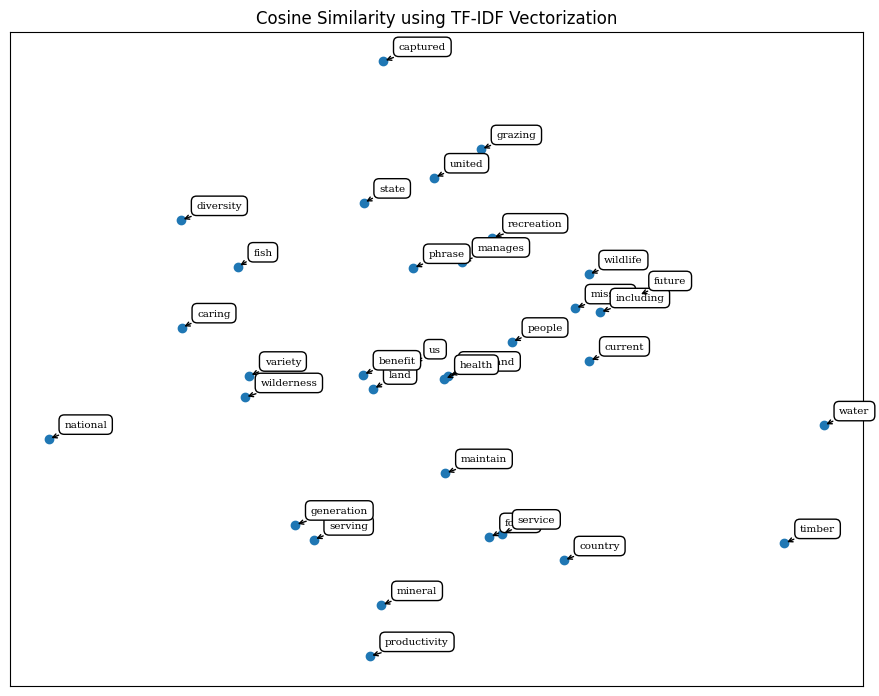

XY coordinates plot showing relative similarity of vectorized words with grassland matches to forest at 79%.

In [64]:
# Destroy any previous plots so things don't buffer with Agg and what not
%matplotlib inline
plt.close()

# Caption
caption_text=f"XY coordinates plot showing relative similarity of vectorized words with {token1_value} matches to {token2_value} at {highest_sim:.0%}."
# Plot setup
fig, ax = plt.subplots(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));

# Hide the axis value because they mean nothing to us
bit_bucket=plt.xticks([]);
bit_bucket=plt.yticks([]);

bit_bucket=plt.xlabel('');
bit_bucket=plt.ylabel('');
bit_bucket=plt.title(f'Cosine Similarity using TF-IDF Vectorization');
bit_bucket=ax.scatter(x=xs, y=ys,label=labels);
bit_bucket=ax.grid(False)
#plt.axis('off');


# Make the Labels
for idx, txt in enumerate(labels):
    bit_bucket=ax.annotate(txt,
                           (xs[idx], ys[idx]),
                           xytext=(xs[idx] + 0.02, ys[idx] + 0.02),
                           fontsize=IMG_FONT_SIZE_MIN * 0.75, fontfamily='Serif',
                           bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
                           arrowprops=dict(arrowstyle="->",connectionstyle="arc3"),
                          );
plt.show()
rprint(caption_text)

### Consider Cluestar

This library contains visualisation tools that might help you get started with classification tasks. The idea is that if you can inspect clusters easily, you might gain a clue on what good labels for your dataset might be!

Reference: https://github.com/koaning/cluestar/tree/main


In [65]:
# Plot the results
from cluestar import plot_text

caption_text=f"""Interactive graphic showing the distance of each word to another based on TF-IDF Vectorization."""
plot_text(X, the_words)
rprint(caption_text)

alt.HConcatChart(...)

Interactive graphic showing the distance of each word to another based on TF-IDF Vectorization.

In [66]:
# Another plot using targeted words in a different color to help identify differences in cosine similarity
plot_text(X, the_words, color_words=target_words)
rprint(caption_text)

alt.HConcatChart(...)

Interactive graphic showing the distance of each word to another based on TF-IDF Vectorization.

### t-SNE

t-SNE is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map.

t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a statistical method for visualizing high-dimensional data by reducing it to lower- dimensional spaces, typically two or three dimensions.

This makes it easier to visualize and interpret the data, especially when dealing with complex datasets like those in machine learning and data science.

#### Core idea of t-SNE :

The core idea behind t-SNE is to map high-dimensional data points to a lower-dimensional space, typically two or three dimensions, in a way that preserves the local relationships between points. It achieves this by measuring the similarity between data points in the high-dimensional space and representing this similarity as probabilities. Then, it constructs a similar probability distribution in the lower-dimensional space and minimizes the difference between the two distributions using a technique called gradient descent. This process allows t-SNE to effectively capture the local structure of the data, making it particularly useful for visualizing complex datasets and discovering meaningful patterns.

What is the meaning of preserving local relationships between points ?
“Preserving the local relationships between points” in the context of t-SNE refers to maintaining the relative distances and similarities between neighboring data points when they are mapped from a high-dimensional space to a lower-dimensional space.

Imagine you have a dataset where similar data points are located close to each other in the high-dimensional space. Preserving local relationships means that after the dimensionality reduction, these similar points should still be positioned closely together in the lower-dimensional space. Similarly, if two data points are dissimilar or distant from each other in the original space, they should remain relatively far apart in the reduced-dimensional space.

#### Geometrical Intuition of t-SNE :

The concept behind t-SNE involves computing the similarity between each data point and all others points in the dataset. Leveraging these similarity scores, the algorithm reduces the dimensionality of the data to 2D or 1D while preserving the local relationships(i.e. finding the nearest neighbors) among points.

#### Reference(s):
+ https://medium.com/@sachinsoni600517/mastering-t-sne-t-distributed-stochastic-neighbor-embedding-0e365ee898ea

In [67]:
# Reference: https://grahamholker.com/posts/document-vectors-with-spacy/

# Load each word from the clean text into a data structure
the_words = [{"word":word} for word in clean_body_of_text.split()]

# Iterate through the words and store NLP spaCy data
for word in the_words:
  doc = nlp(word["word"])
  word['word']=word["word"]
  word['vector'] = doc.vector
  word['entities'] = list(doc.ents)

# Create a dictionary sufficient for Pandas build
word_dict = dict((word['word'], word['vector']) for word in the_words if 'vector' in word)

# Build a Panda's data frame
df = pd.DataFrame.from_dict(word_dict, orient='index')
df

0         1          2         3          4         5    \
productivity  -0.60521   -1.1621    -2.6831    3.8588     4.1923   -2.4848   
grazing       -0.84279   0.67429    -4.2897   -0.4675   -0.43261  -0.79042   
caring        -0.89002   0.89627    -5.3836   -4.1062     1.7436  0.038666   
us              4.1588    4.4328    -10.659   -1.1384    -2.9831    1.0313   
grassland     -0.92263   0.40511    -1.5248   0.29959     1.5736  -0.64871   
land           -5.9559  -0.98104    -2.2583  -0.38403    0.18842    4.4896   
serving        -3.6643  -0.73134    -5.5915   0.33487     4.0682   -1.3218   
timber         -5.0562    -4.181     -1.795    1.9875    0.99001   -2.6597   
united         -2.5378   0.90527    -2.2735   0.97913     4.6606    1.4839   
state          -2.5686   0.98039    -4.9824    2.3035     8.5114   0.55127   
country       -0.41393    2.5361    -2.2446    1.2471     6.8427    2.5825   
wildlife        0.5224   -1.8313    -4.5872   -5.2127     2.0645     1.125   
diversity     -0.47769    1.2515    -1.4923   0.66403     3.4879    1.8298   
current        0.44888   0.68698   -0.61755   0.30613     5.6139    1.5518   
manages         3.9614    1.6104  -0.058356  -0.88577     3.1313   0.73068   
health          1.3115    1.6485    -5.8189    2.7559     4.8246   -1.1699   
people         -2.1135    3.0206    -7.0802    1.3176     2.5069    1.5384   
national      -0.70244   -1.4425    0.16912   0.98705     9.3194   0.29746   
mission         2.6321    2.2471   -0.43209   -0.8129     3.7058     2.219   
benefit        -2.3447   -1.5221    -3.0382    1.3857     1.9381   0.61738   
including      -2.9074    -5.505    0.36127   0.55051     7.1073    1.5357   
phrase          1.9098    1.8119     6.8463   -1.8918     1.6439  0.012368   
forest        -0.91839  -0.85007    -4.5276   0.52686    0.76045    0.8503   
recreation     -1.3816   -1.7865      1.476   -1.0238      1.803    1.3995   
water           0.4385    2.3042    -5.3033    2.6234     1.4533   -4.8786   
future          1.7561    3.5755      -2.56   -2.7815    0.98412    2.4834   
maintain       -1.8678    1.3054    -3.2409    1.6617     6.3352  -0.88712   
variety       -0.87026   -4.5532    -5.2659    4.2826    -1.5654    -1.686   
mineral       0.056224   -4.5906    -2.0948   -0.7575      2.691   -5.1347   
generation     -3.4288  -0.55171     5.4136    1.4538     2.1578  0.035595   
wilderness     0.57778    1.1121    -1.9029   -1.8667  -0.014357   0.86063   
captured        -5.192   -0.1565    -2.8415  -0.90984     1.9426   0.67192   
fish           -1.1278   -4.2107    -4.1088   0.73152     3.3726    -2.538   
service        -2.0066  -0.44998   -0.28067   0.32224     4.8174   -1.5154   

                    6        7          8         9    ...        290  \
productivity     2.8023   5.9466    -1.7306   -4.4086  ...    0.58103   
grazing          1.5979   4.2291    0.86431    1.1457  ...    -1.9399   
caring          0.92561   1.5552  -0.096525     2.756  ...    -1.6783   
us              -0.7513  -8.8503    -8.3515    7.8921  ...     13.837   
grassland       0.61561   4.5212     1.2848     2.128  ...  -0.073965   
land          -0.074958   6.8876     1.1256    4.4899  ...   -0.77542   
serving          1.1349   2.7151    -2.7314  -0.11613  ...    0.56267   
timber           3.0152   4.7094    -1.5541    2.5933  ...    -2.9773   
united           3.0017  0.94239     2.8147   -1.6694  ...     4.1502   
state            4.1957   4.2711    -2.1767   -3.0866  ...     1.6474   
country          2.6424   3.3739    0.12068  -0.25952  ...     4.8477   
wildlife         2.6715   2.4186     1.5229   -1.1215  ...   -0.94175   
diversity        2.6419    5.529    -1.9793   -1.2389  ...     1.5004   
current          3.0335   3.4221    -1.1926   -2.1647  ...    0.67607   
manages         -0.6444   4.2654    0.13329   -3.3785  ...    -1.9957   
health           1.1501   5.0687   -0.58208   -1.1435  ...    -3.1487   
people           1.0158   2.4045     -4.013    

In [68]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_vectors = tsne.fit_transform(df)
tsne_vectors = pd.DataFrame(index=df.index, data=tsne_vectors)
test = {
    'word'    : word_dict.keys(),
    'x_coord' : tsne_vectors[0].values,
    'y_coord' : tsne_vectors[1].values
}
tsne_vectors = pd.DataFrame(test, index=pd.Index(df.index))
tsne_vectors

word   x_coord   y_coord
productivity  productivity  0.603355  7.259281
grazing            grazing  0.862731  7.682894
caring              caring  0.343741  7.440343
us                      us -0.310230  8.253952
grassland        grassland  0.926813  7.602915
land                  land  1.607203  7.338242
serving            serving  0.456407  7.014916
timber              timber  1.074234  7.700093
united              united  0.300733  7.426085
state                state  0.656487  6.571726
country            country  0.542501  7.105310
wildlife          wildlife  0.848450  7.647058
diversity        diversity  0.602581  7.227098
current            current  0.560945  7.189565
manages            manages  0.554925  7.407810
health              health -0.008236  6.792248
people              people  0.204410  7.736638
national          national  0.654573  6.772111
mission            mission  0.372225  7.192584
benefit            benefit  0.377406  7.358613
including        including  0.809119  6.963183
phrase              phrase  0.460595  7.882464
forest              forest  1.088310  7.646264
recreation      recreation  0.711820  7.190358
water                water  1.422493  7.845310
future              future  0.255404  7.391257
maintain          maintain  0.501910  7.252487
variety            variety  0.989349  7.180658
mineral            mineral  0.977108  7.451012
generation      generation  0.624614  6.985197
wilderness      wilderness  0.744029  7.587857
captured          captured  0.578763  7.760760
fish                  fish  1.140655  8.123008
service            service  0.279661  6.898258

In [69]:
# Import Bokeh to diplay solution

rprint("Make sure Bokeh is installed.")

# Encountered problems in session where GPU was utilized and System encoding, in session, changes to ANSI*, normalize back to UTF-8
locale.getpreferredencoding = getpreferredencoding

# Identify the libraries you'd like to add to this Runtime environment.
libraries=["bokeh",]

# Loop through each library and test for existence, if not present install quietly
for library in libraries:
    if library == "Pillow":
      spec = importlib.util.find_spec("PIL")
    else:
      spec = importlib.util.find_spec(library)
    if spec is None:
      print("Installing library " + library)
      subprocess.run(["pip", "install" , library, "--quiet"], check=True)
    else:
      print("Library " + library + " already installed.")

Make sure Bokeh is installed.

Library bokeh already installed.


In [70]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource,  Label, LabelSet, Range1d

output_notebook()

In [71]:
# Source -> https://github.com/skipgram/modern-nlp-in-python/blob/master/executable/Modern_NLP_in_Python.ipynb

plot_data = ColumnDataSource(data=tsne_vectors)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(
                   title=u't-SNE Word Embeddings',
                   sizing_mode="stretch_width",
                   max_width=1024,
                   height=768,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom'
                  )

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@index') )


# draw the words as circles on the plot
tsne_plot.scatter(x=u'x_coord',
                 y=u'y_coord',
                 source=plot_data,
                 line_alpha=0.2,
                 fill_alpha=1,
                 size=10,
                 hover_line_color=u'black')

# configure visual elements of the plot
labels = LabelSet(x='x_coord', y='y_coord', text='word',
              x_offset=5, y_offset=5, source=plot_data)

tsne_plot.add_layout(labels)

tsne_plot.title.text_font_size = u'16pt'
tsne_plot.xaxis.visible = True
tsne_plot.yaxis.visible = True
tsne_plot.grid.grid_line_color = u'black'
tsne_plot.outline_line_color = u'black'


# engage!
show(tsne_plot);

# Same functions can be performed on sentences, just use a sentence transformer.